<h2>HR-Analytics-Insights: Exploring Employee Factors and Organizational Dynamics</h2>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from datetime import datetime, timedelta
from matplotlib.patches import Ellipse
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.utils import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
import folium
import geopandas as gpd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

# seed
RSEED = 10

In [2]:
# Custom date parser function
def custom_date_parser(date_string):
    try:
        return pd.to_datetime(date_string, format='%m/%d/%Y')
    except ValueError:
        return pd.to_datetime(date_string, format='%m/%d/%y').replace(year=1900 + int(date_string.split('/')[-1]))

data = pd.read_csv('Human_Resuorces_Analytics.csv', parse_dates=['DOB'], date_parser=custom_date_parser)


<h3>Section A (Data Exploration and Pre-processing) </h3>

Here I will answer the first question "What is the overall diversity profile of the organization?"

So to answer this question we can analyze the distribution of employee demographics such as marital status,ethnicity,race,age,gender and recruitment source.

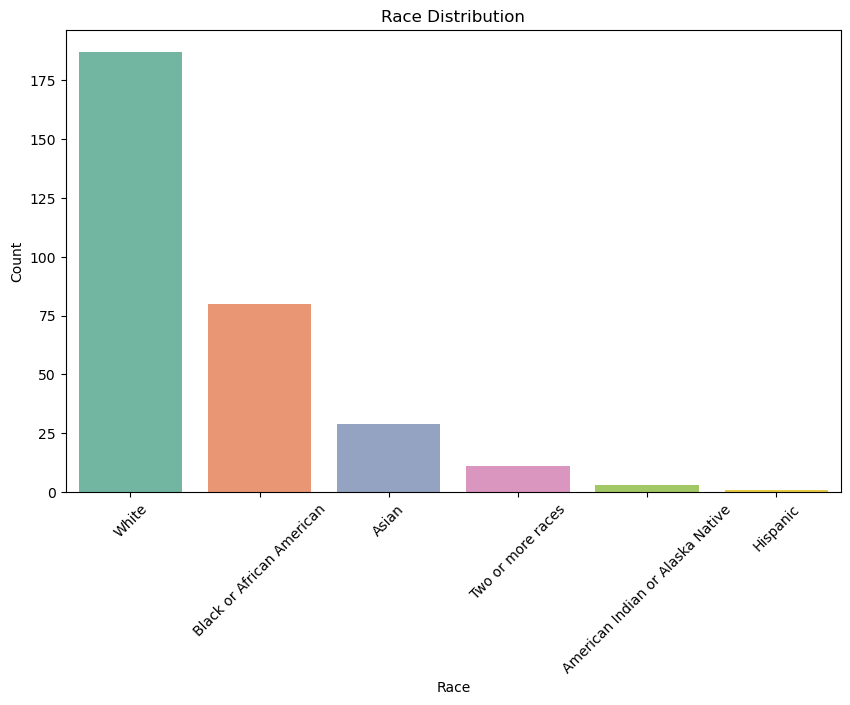

In [3]:
race_counts = data['RaceDesc'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='Set2')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

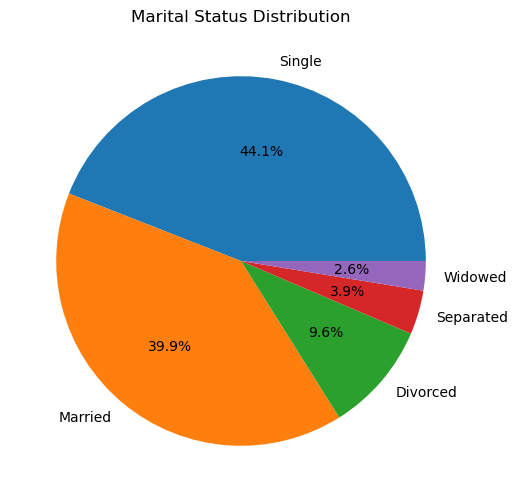

In [4]:
marital_counts = data['MaritalDesc'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()


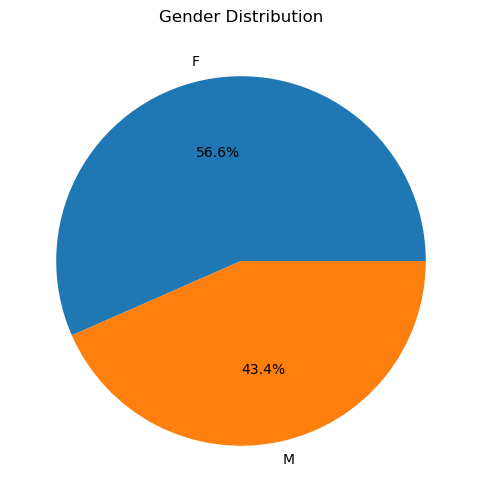

In [5]:
gender_counts = data['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [6]:
# We realize that and 'HispanicLatino' column have yes,Yes,No,no so we normalize the values 
data['HispanicLatino'] = data['HispanicLatino'].str.lower().replace({'no': 'No', 'yes': 'Yes'})

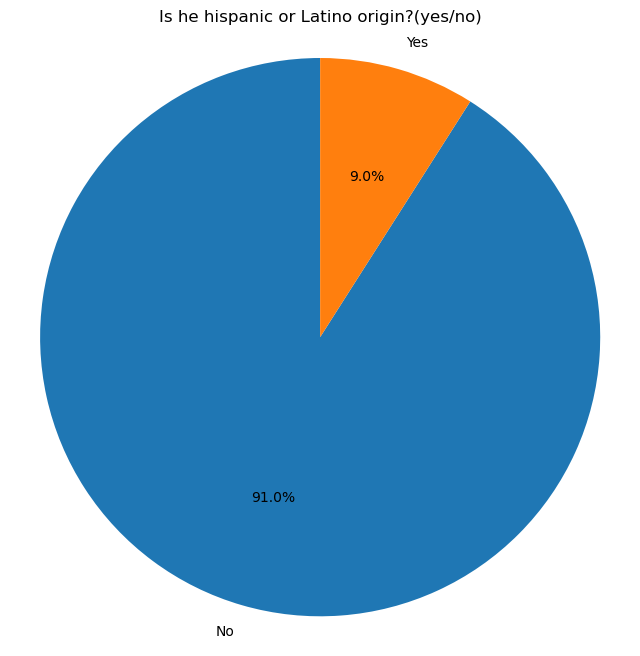

In [7]:
# Calculate the counts of each ethnicity
ethnicity_counts = data['HispanicLatino'].value_counts()

# Plot the ethnicity distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Is he hispanic or Latino origin?(yes/no)')
plt.axis('equal')
plt.show()


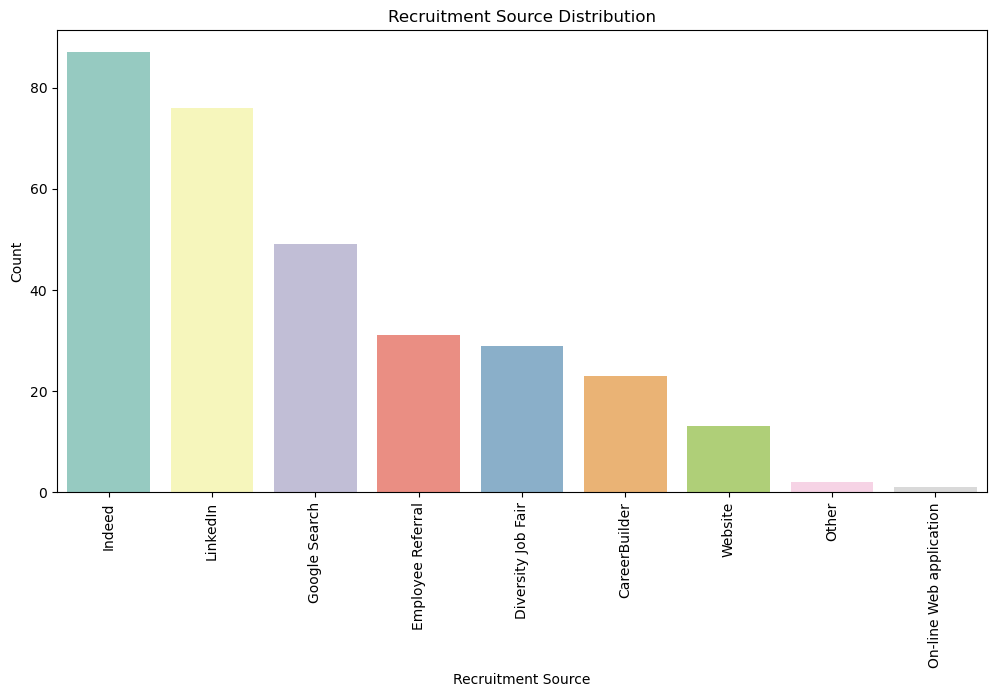

In [8]:
recruitment_counts = data['RecruitmentSource'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=recruitment_counts.index, y=recruitment_counts.values, palette='Set3')
plt.title('Recruitment Source Distribution')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

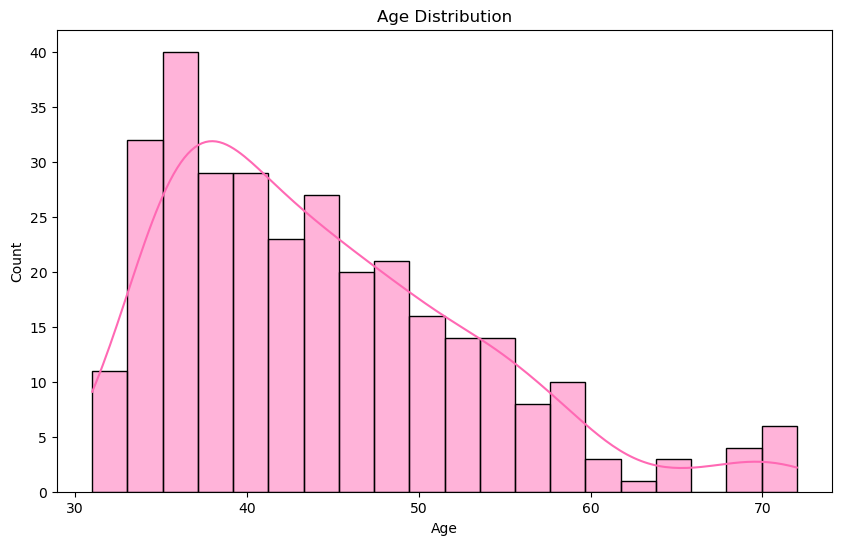

In [9]:
# Calculate age
data['Age'] = pd.Timestamp('now').year - data['DOB'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='#FF69B4')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

So from the results the overall diversity profile of the organization :race,marital status,age,gender,the hispanic or Latino origin and The source from which the employee was recruited (RecruitmentSource).

<h3>For question 2 :"Is there any relationship between who a person works for and their performance score?"</h3>

In [10]:
filtered_data = data[data['PerfScoreID'].isin([1, 2, 3, 4])]
print(filtered_data[['PerfScoreID', 'PerformanceScore']])


     PerfScoreID PerformanceScore
0              4          Exceeds
1              3      Fully Meets
2              3      Fully Meets
3              3      Fully Meets
4              3      Fully Meets
..           ...              ...
306            3      Fully Meets
307            1              PIP
308            4          Exceeds
309            3      Fully Meets
310            3      Fully Meets

[311 rows x 2 columns]


1=PIP ,2=Needs improvment ,3=Fully Meets ,4=Exceeds

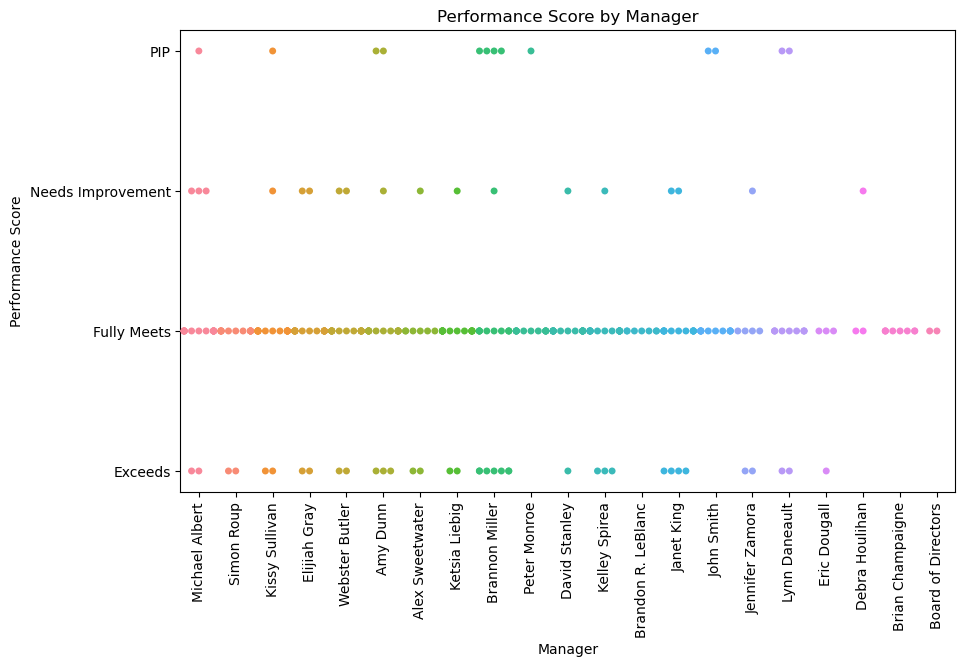

In [11]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='ManagerName', y='PerformanceScore', data=data)
plt.title('Performance Score by Manager')
plt.xlabel('Manager')
plt.ylabel('Performance Score')
plt.xticks(rotation=90)
plt.show()


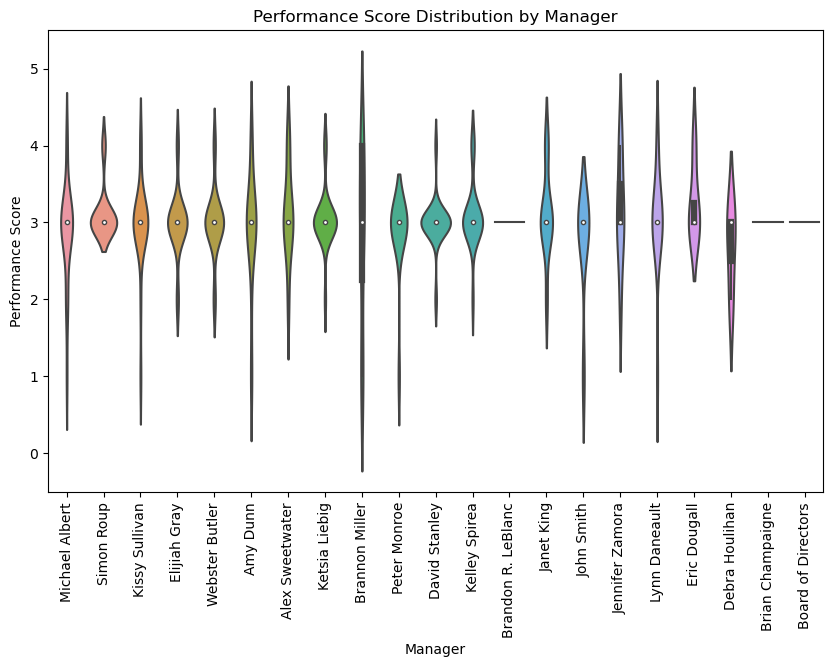

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ManagerName', y='PerfScoreID', data=data)
plt.title('Performance Score Distribution by Manager')
plt.xlabel('Manager')
plt.ylabel('Performance Score')
plt.xticks(rotation=90)
plt.show()


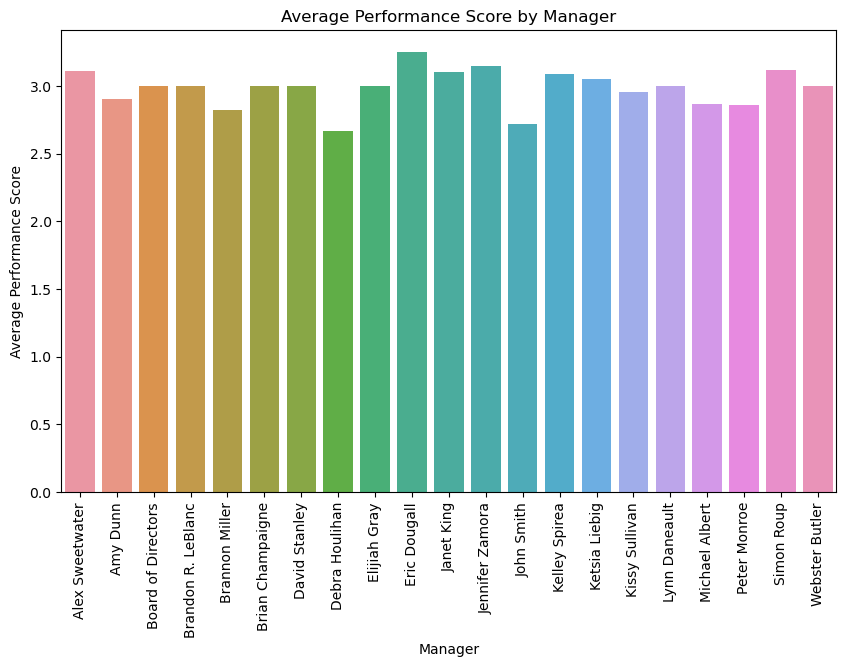

In [13]:
manager_performance = data.groupby('ManagerName')['PerfScoreID'].mean().reset_index()

# Plot the relationship between managers and average performance scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ManagerName', y='PerfScoreID', data=manager_performance)
plt.title('Average Performance Score by Manager')
plt.xlabel('Manager')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=90)
plt.show()

Based on the result,Simon Roup and Eric Dougall managers,may we see that they have employees with high  we can conclud that the specific manager does not have a noticeable impact on their performance score. The average performance scores across different managers are almost similar, indicating that performance is not strongly influenced by the manager,beacuse maybe a manager have the best employees and the performance score that this employees have is the highest (exceeds) but this is not beacuse the relationship between them,maybe beacuse that they are the best employees(so there are several features that assosiated with the performance) and vice versa.

<h3>And question 3:"Are there areas of the company where pay is not equitable?"</h3>

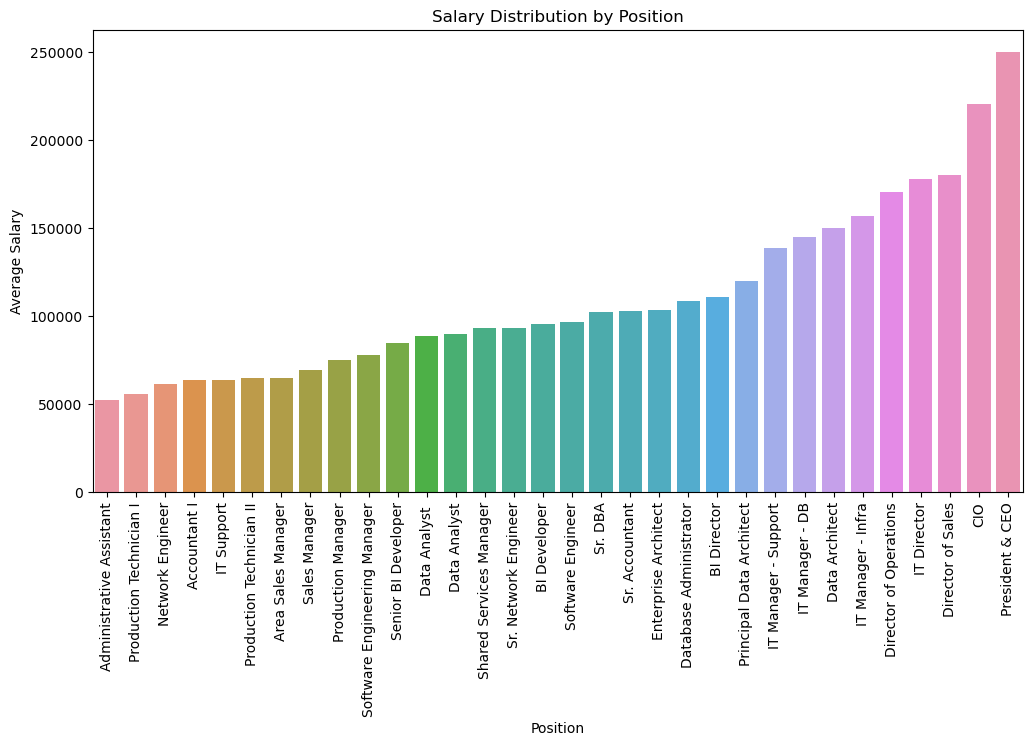

In [14]:
#Salary Distribution by Position:
position_salaries = data.groupby('Position')['Salary'].mean().sort_values()

# Create a bar plot to visualize salary distribution by position
plt.figure(figsize=(12, 6))
sns.barplot(x=position_salaries.index, y=position_salaries.values)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

The results we got are normal,beacuse differenets positions usually get a differnet salaries (according to the importanat the position),but we will see for each gender and experince years if there is equitable.

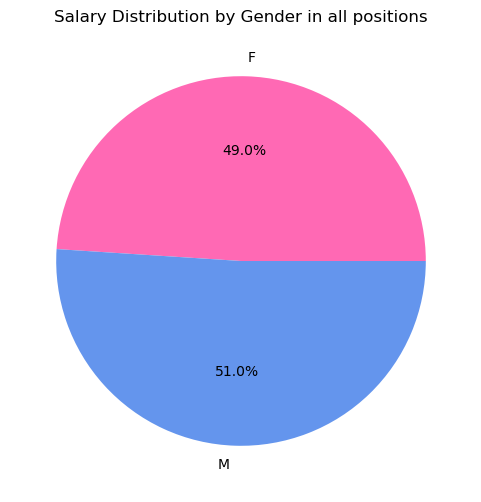

In [15]:
# Calculate average salary by gender
gender_salaries = data.groupby('Sex')['Salary'].mean()

# Calculate total salary across all positions
overall_salary = data['Salary'].mean()

# Calculate salary proportions for each gender
gender_proportions = gender_salaries / overall_salary

# Create a pie chart to visualize the salary distribution by gender
plt.figure(figsize=(6, 6))
plt.pie(gender_proportions, labels=gender_salaries.index, autopct='%1.1f%%', colors=['#FF69B4', '#6495ED'])
plt.title('Salary Distribution by Gender in all positions')
plt.show()


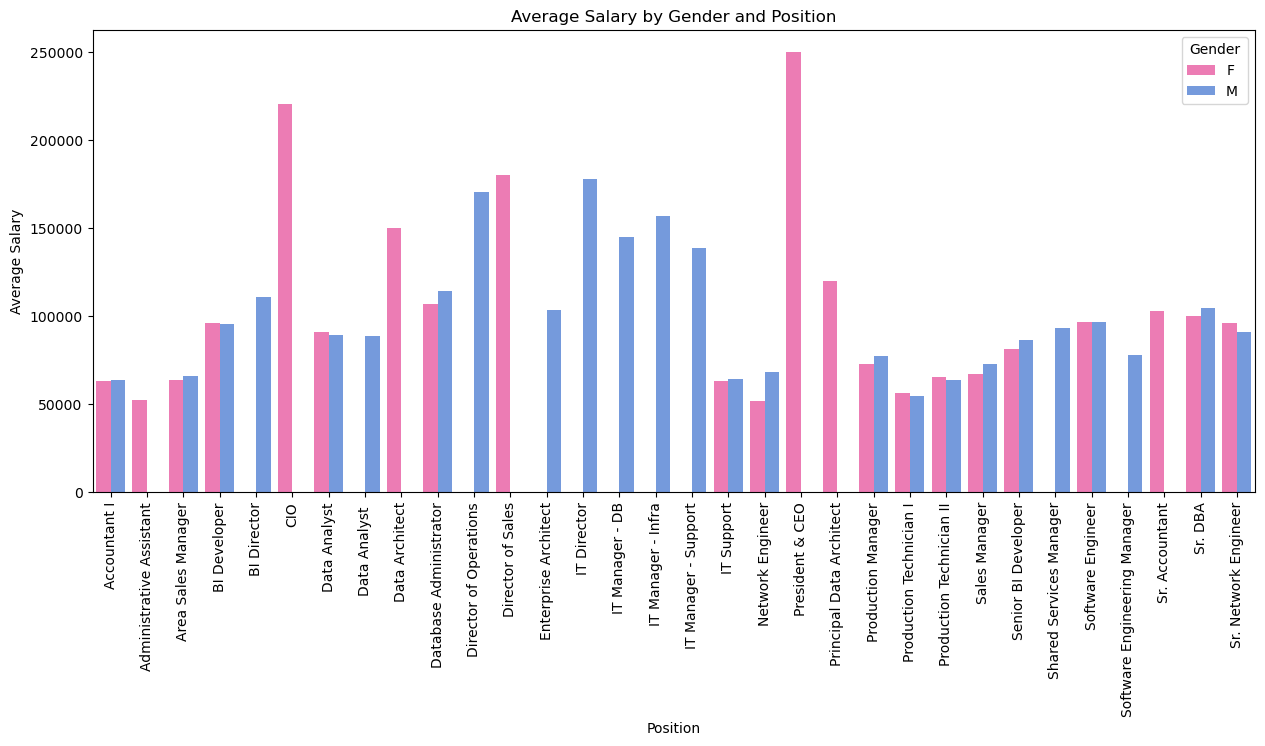

In [16]:
Position_salary_experience = data.groupby(['Position', 'Sex'])['Salary'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Position', y='Salary', hue='Sex', data=Position_salary_experience,  palette=['#FF69B4', '#6495ED'])
plt.title('Average Salary by Gender and Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()


As we see in the differnet poistions,they pay almost equitable to the males and feamles,some postion pay for females more anfd some for males more but overall its the same.

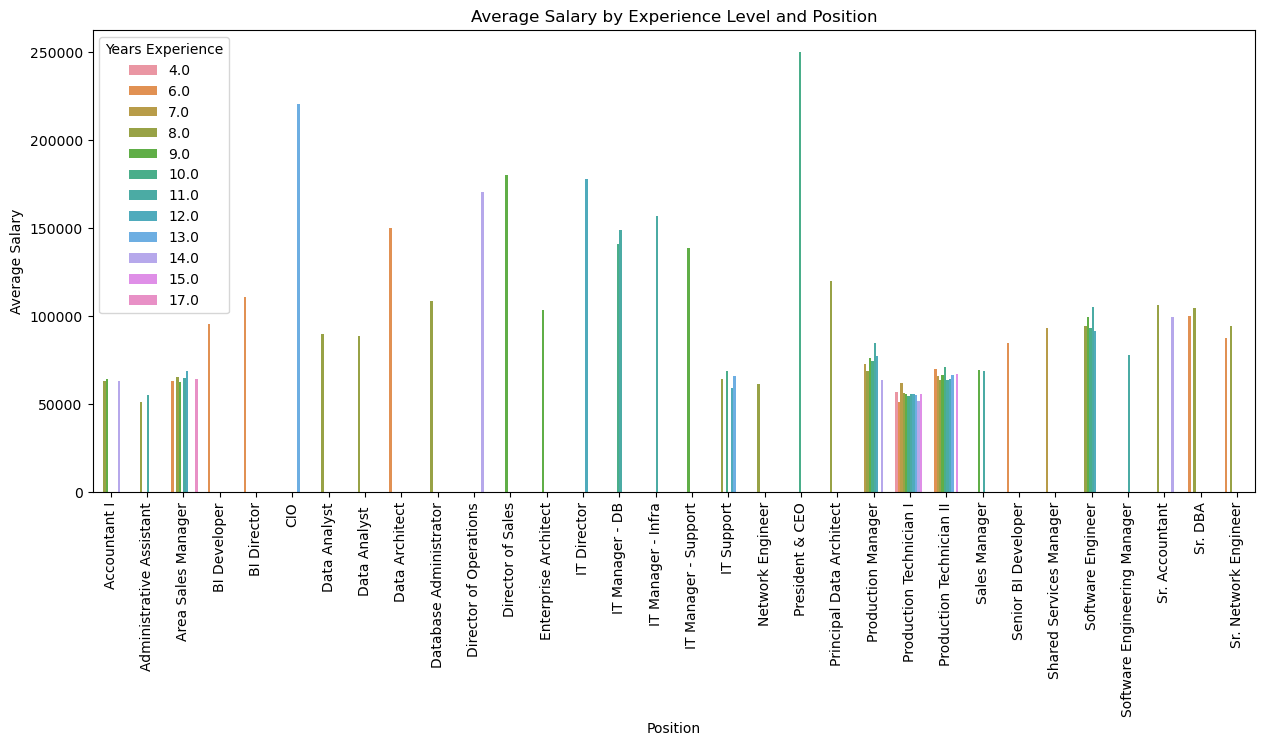

In [17]:
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['YearsExperience'] = (pd.Timestamp('now') - data['DateofHire']).astype('<m8[Y]')

Position_salary_experience = data.groupby(['Position', 'YearsExperience'])['Salary'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Position', y='Salary', hue='YearsExperience', data=Position_salary_experience)
plt.title('Average Salary by Experience Level and Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.legend(title='Years Experience')
plt.show()

As we see in the differnet poistions where ther are more that 1 or 2 employees that wirk there,they aren't pay equitable according to the years of experience ,for example in Production manager poition, employees who are with 14 years experience get less that 9 years employees in the same position.

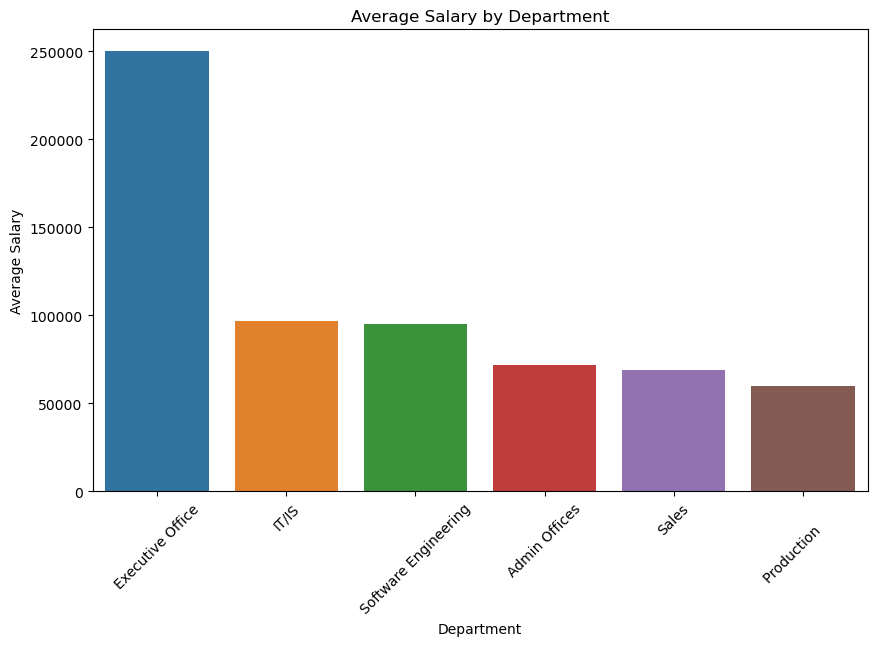

In [18]:
###Salary Distribution by Department:
avg_salary_by_dept = data.groupby('Department')['Salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_dept.index, y=avg_salary_by_dept.values)
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


Here also the results we got are normal,beacuse differents departments usually get a different salaries (according to the department work).

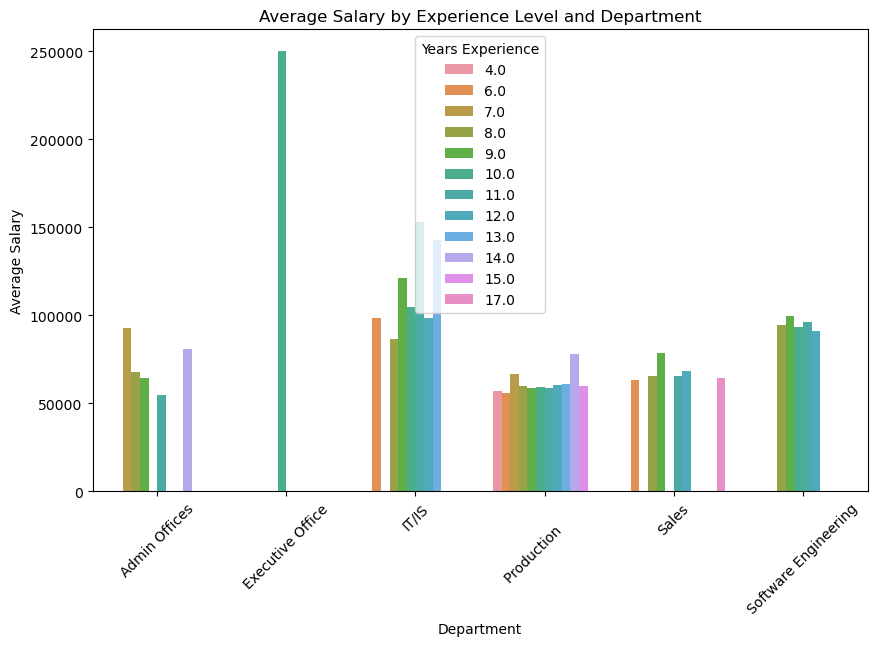

In [19]:
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['YearsExperience'] = (pd.Timestamp('now') - data['DateofHire']).astype('<m8[Y]')

# Calculate the average salary by experience level for each department
department_salary_experience = data.groupby(['Department', 'YearsExperience'])['Salary'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Salary', hue='YearsExperience', data=department_salary_experience)
plt.title('Average Salary by Experience Level and Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend(title='Years Experience')
plt.show()


As we see in the differnet departments they aren't pay equitable according to the years of experience ,for example in admin offices department, employees who are with 14 years experience get less that 7 years employees in the same department.

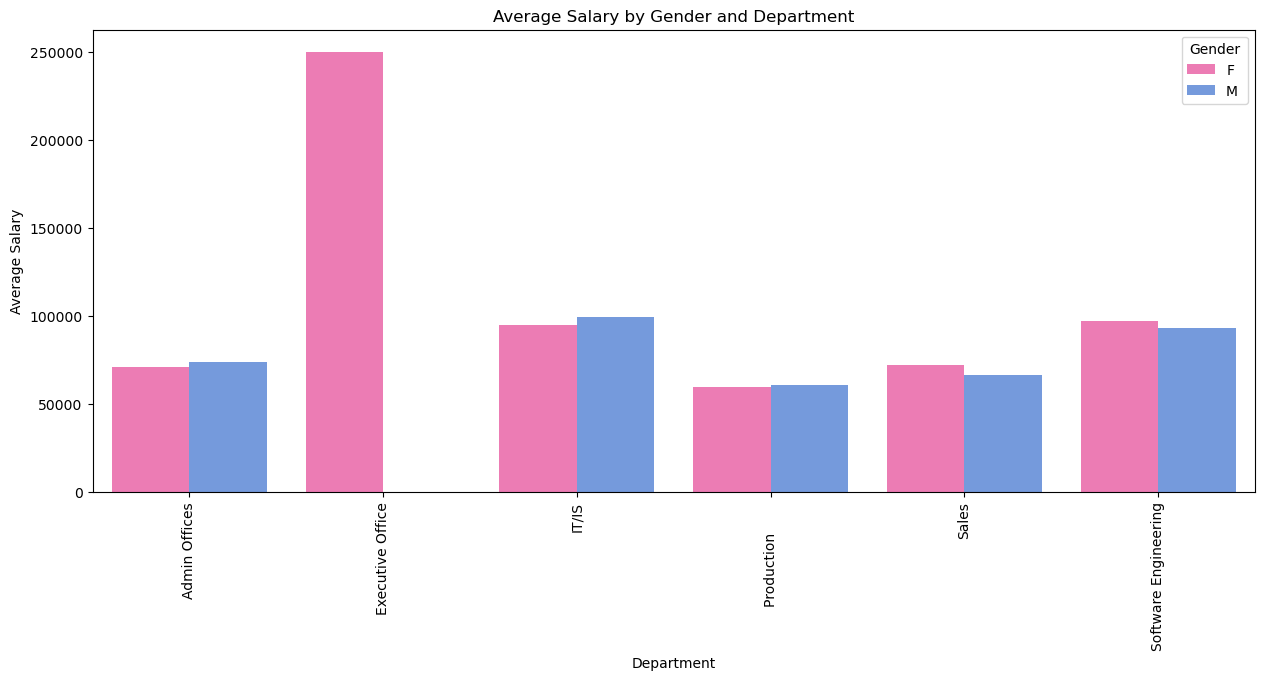

In [20]:
Department_salary_experience = data.groupby(['Department', 'Sex'])['Salary'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Department', y='Salary', hue='Sex', data=Department_salary_experience,  palette=['#FF69B4', '#6495ED'])
plt.title('Average Salary by Gender and Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()


As we see in the differnet departments,they pay almost equitable to the males and feamles,some departments pay for females more and some for males more but overall its the same.

<h3>Except for these questions now I will display more visualizations of our choice that shows interesting insights on the data:</h3>

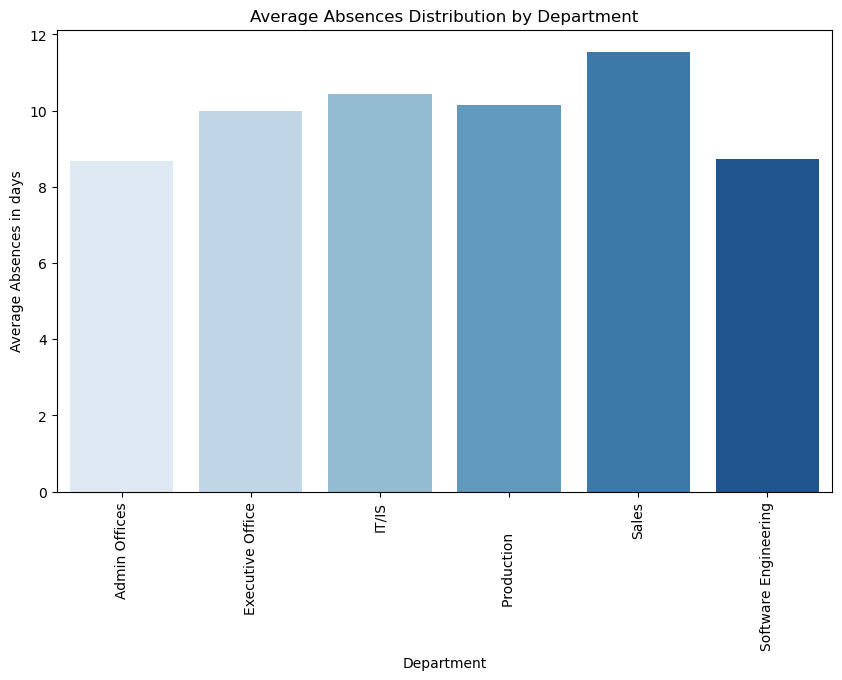

In [21]:
# Calculate the average absences by department
avg_absences_by_dept = data.groupby('Department')['Absences'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Absences', data=avg_absences_by_dept, palette='Blues')
plt.title('Average Absences Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Average Absences in days')
plt.xticks(rotation=90)
plt.show()


We can see by this graph sales department with the higher rate of absences, which may indicate that the employees engagement levels is low there and also maybe the profits here is lower.

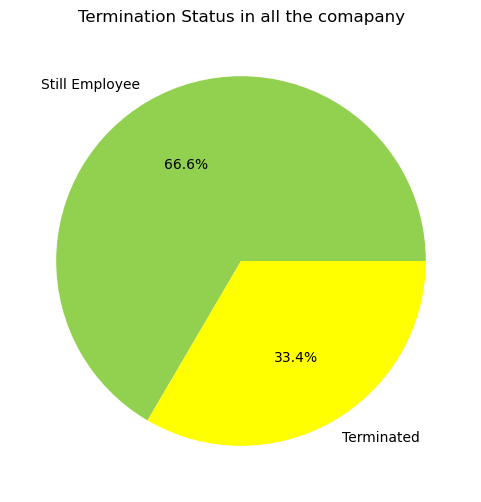

In [22]:
termination_counts = data['Termd'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(termination_counts.values, labels=['Still Employee', 'Terminated'], autopct='%1.1f%%', colors=['#92D050', '#FFFF00'] )
plt.title('Termination Status in all the comapany')
plt.show()

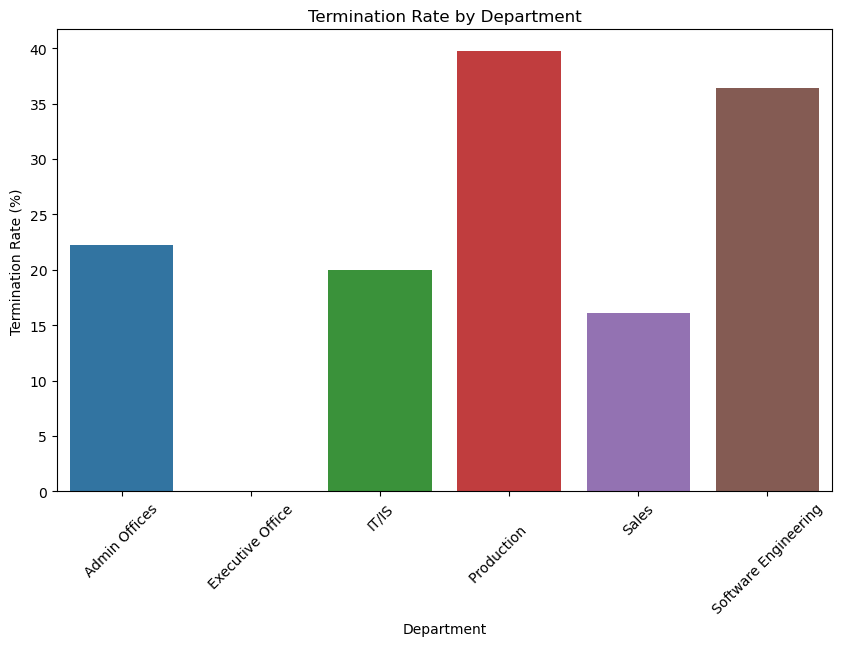

In [23]:
termination_by_dept = data.groupby('Department')['Termd'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=termination_by_dept.index, y=termination_by_dept.values)
plt.title('Termination Rate by Department')
plt.xlabel('Department')
plt.ylabel('Termination Rate (%)')
plt.xticks(rotation=45)
plt.show()


Here we can see the termaintion rate across different departments in the company, as we see the the production and software engineering departments with higher termaintion rates, that can indicate potential issues related to employee retention, job satisfaction and work environment(the majority is in the production department).

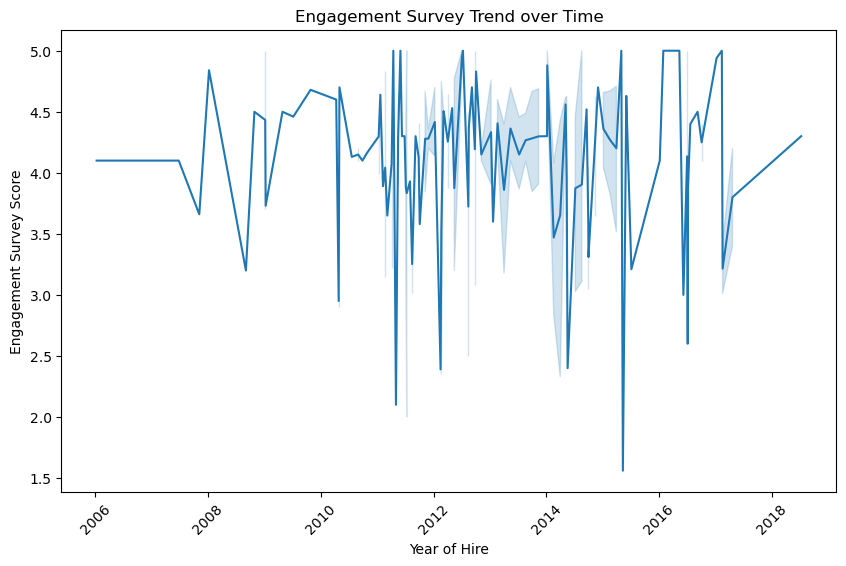

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='DateofHire', y='EngagementSurvey', data=data)
plt.title('Engagement Survey Trend over Time')
plt.xlabel('Year of Hire')
plt.ylabel('Engagement Survey Score')
plt.xticks(rotation=45)
plt.show()


We can see using this line plot the trend of employee engagement survey scores over time,there is so many can changes in employee engagement levels over the years.


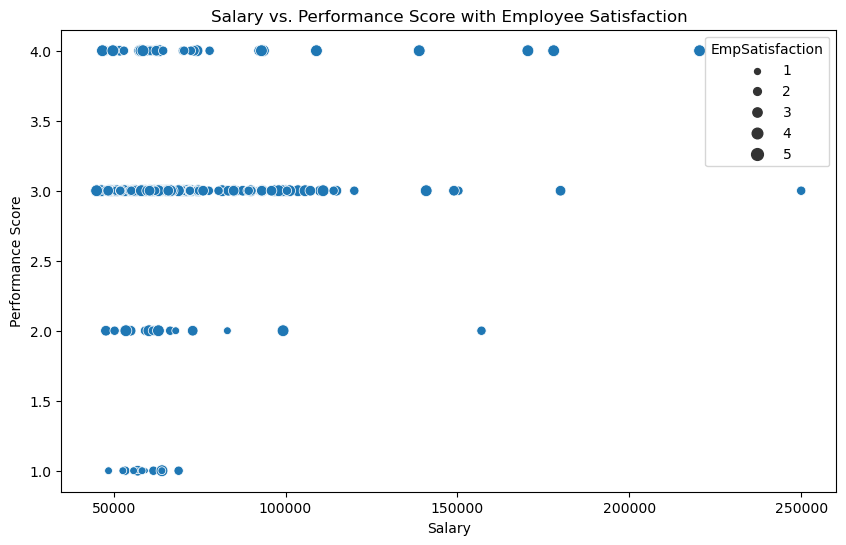

In [25]:
#Salary vs. Performance Score with Employee Satisfaction 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PerfScoreID', size='EmpSatisfaction', data=data)
plt.title('Salary vs. Performance Score with Employee Satisfaction')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()
#the bubble size represents the employee satisfaction level, so I have salary-performance
#relationship while also considering the satisfaction level to every employee.

<h3>Pre-processing</h3>

<h4>Imputation;</h4>

In [26]:
data.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

As we see the DateofTerminaon has nulls so I will fill it with 0 beacuse its the date when the employee was terminated, if applicable,so if not it will have a null value so we can conclude that he still working and not terminated so I fill it with
1900-01-01

In [27]:
# Check if any values in 'DateofTermination' are equal to '1900-01-01'
has_date= any(data['DateofTermination'] == pd.Timestamp('1900-01-01'))

# Print the result
if has_date:
    print("Some values in 'DateofTermination' are equal to '1900-01-01'")
else:
    print("No values in 'DateofTermination' are equal to '1900-01-01'")


No values in 'DateofTermination' are equal to '1900-01-01'


In [28]:
data['DateofTermination'] = data['DateofTermination'].fillna(pd.Timestamp('1900-01-01'))


In [29]:
data.isna().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [30]:
null_manager_rows = data[data['ManagerID'].isnull()]

# Print the "ManagerID" and "ManagerName" columns for the rows with null values
print(null_manager_rows[['ManagerID', 'ManagerName']])


     ManagerID     ManagerName
19         NaN  Webster Butler
30         NaN  Webster Butler
44         NaN  Webster Butler
88         NaN  Webster Butler
135        NaN  Webster Butler
177        NaN  Webster Butler
232        NaN  Webster Butler
251        NaN  Webster Butler


In [31]:
manager_id_name = data[data['ManagerName'] == 'Webster Butler'][['ManagerID', 'ManagerName']]
print(manager_id_name)


     ManagerID     ManagerName
4         39.0  Webster Butler
19         NaN  Webster Butler
30         NaN  Webster Butler
44         NaN  Webster Butler
65        39.0  Webster Butler
88         NaN  Webster Butler
89        39.0  Webster Butler
105       39.0  Webster Butler
124       39.0  Webster Butler
135        NaN  Webster Butler
151       39.0  Webster Butler
174       39.0  Webster Butler
177        NaN  Webster Butler
198       39.0  Webster Butler
206       39.0  Webster Butler
214       39.0  Webster Butler
232        NaN  Webster Butler
251        NaN  Webster Butler
276       39.0  Webster Butler
280       39.0  Webster Butler
300       39.0  Webster Butler


In [32]:
manager_id = data[data['ManagerName'] == 'Webster Butler']['ManagerID'].iloc[0]

In [33]:
data['ManagerID'].fillna(39.0, inplace=True)

Beacuse we see that all the manager's that dont have id are related to the same person 'Webster Butler' so we see that this person have id=39 from the rest managers that gave this name ,and we fill the nulls wit it.

<h3>Transformation:</h3>

In [34]:
#One hot encoding for HispanicLatino col:
label_encoder = LabelEncoder()

data['HispanicLatino'] = label_encoder.fit_transform(data['HispanicLatino'])


In [35]:
#One hot encoding for FromDiversityJobFairID col:
label_encoder = LabelEncoder()

data['FromDiversityJobFairID'] = label_encoder.fit_transform(data['FromDiversityJobFairID'])


In [36]:
#One hot encoding for ManagerID col:
label_encoder = LabelEncoder()

data['ManagerID'] = label_encoder.fit_transform(data['ManagerID'])


In [37]:
label_encoder = LabelEncoder()

data['Termd'] = label_encoder.fit_transform(data['Termd'])


In [38]:
label_encoder = LabelEncoder()

data['MaritalDesc'] = label_encoder.fit_transform(data['MaritalDesc'])


In [39]:
label_encoder = LabelEncoder()

data['Zip'] = label_encoder.fit_transform(data['Zip'])


In [40]:
label_encoder = LabelEncoder()

data['Position'] = label_encoder.fit_transform(data['Position'])


In [41]:
label_encoder = LabelEncoder()

data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])
          

In [42]:
#TermReason
label_encoder = LabelEncoder()

data['TermReason'] = label_encoder.fit_transform(data['TermReason'])

In [43]:
#Department
label_encoder = LabelEncoder()

data['Department'] = label_encoder.fit_transform(data['Department'])

In [44]:
label_encoder = LabelEncoder()

data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])
          

In [45]:
label_encoder = LabelEncoder()

data['CitizenDesc'] = label_encoder.fit_transform(data['CitizenDesc'])
          

In [46]:
label_encoder = LabelEncoder()

data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])
          

In [47]:
label_encoder = LabelEncoder()

data['GenderID'] = label_encoder.fit_transform(data['GenderID'])
          

In [48]:
#we use data_E in section E before encoding the state and RaceDesc
data_E = data.copy()

In [49]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the state column and transform the values
data['State'] = label_encoder.fit_transform(data['State'])

# Print the mapping of state values to integers
state_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(state_mapping)

{'AL': 0, 'AZ': 1, 'CA': 2, 'CO': 3, 'CT': 4, 'FL': 5, 'GA': 6, 'ID': 7, 'IN': 8, 'KY': 9, 'MA': 10, 'ME': 11, 'MT': 12, 'NC': 13, 'ND': 14, 'NH': 15, 'NV': 16, 'NY': 17, 'OH': 18, 'OR': 19, 'PA': 20, 'RI': 21, 'TN': 22, 'TX': 23, 'UT': 24, 'VA': 25, 'VT': 26, 'WA': 27}


In [50]:
label_encoder = LabelEncoder()
data_with_RaceDesc=data
data['RaceDesc'] = label_encoder.fit_transform(data['RaceDesc'])


In [51]:
# Convert the 'DateofTermination' column to datetime format
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])


data.loc[data['DateofTermination'] != pd.Timestamp('1900-01-01'), 'TerminationDay'] = data['DateofTermination'].dt.day
data.loc[data['DateofTermination'] != pd.Timestamp('1900-01-01'), 'TerminationMonth'] = data['DateofTermination'].dt.month
data.loc[data['DateofTermination'] != pd.Timestamp('1900-01-01'), 'TerminationYear'] = data['DateofTermination'].dt.year


In [52]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,YearsExperience,TerminationDay,TerminationMonth,TerminationYear
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,5,0,1/17/2019,0,1,40,11.0,NaN,NaN,NaN
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,3,6,2/24/2016,0,17,48,8.0,16.0,6.0,2016.0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3,0,5/15/2012,0,3,35,11.0,24.0,9.0,2012.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,5,0,1/3/2019,0,15,35,15.0,NaN,NaN,NaN
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,4,0,2/1/2016,0,2,34,11.0,6.0,9.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,4,0,2/28/2019,0,13,38,8.0,NaN,NaN,NaN
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,2,0,9/2/2015,5,4,41,14.0,29.0,9.0,2015.0
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,5,6,2/21/2019,0,16,44,13.0,NaN,NaN,NaN
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,3,5,2/1/2019,0,11,44,8.0,NaN,NaN,NaN


In [53]:
#continue to impution 
#fill 0 where the TerminationDay and TerminationMonth and TerminationYear are null
data=data.fillna('0')
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,YearsExperience,TerminationDay,TerminationMonth,TerminationYear
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,5,0,1/17/2019,0,1,40,11.0,0,0,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,3,6,2/24/2016,0,17,48,8.0,16.0,6.0,2016.0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3,0,5/15/2012,0,3,35,11.0,24.0,9.0,2012.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,5,0,1/3/2019,0,15,35,15.0,0,0,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,4,0,2/1/2016,0,2,34,11.0,6.0,9.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,4,0,2/28/2019,0,13,38,8.0,0,0,0
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,2,0,9/2/2015,5,4,41,14.0,29.0,9.0,2015.0
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,5,6,2/21/2019,0,16,44,13.0,0,0,0
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,3,5,2/1/2019,0,11,44,8.0,0,0,0


In [54]:
scaler = MinMaxScaler()

# here we apply the min-max scaling to the "salary" col
data['Salary'] = scaler.fit_transform(data[['Salary']])

In [55]:
scaler = MinMaxScaler()

data['Age'] = scaler.fit_transform(data[['Age']])

In [56]:
scaler = MinMaxScaler()

data['Absences'] = scaler.fit_transform(data[['Absences']])

In [57]:
scaler = MinMaxScaler()

data['YearsExperience'] = scaler.fit_transform(data[['YearsExperience']])

In [58]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,YearsExperience,TerminationDay,TerminationMonth,TerminationYear
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,0.085190,...,5,0,1/17/2019,0,0.000000,0.219512,0.538462,0,0,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,0.289777,...,3,6,2/24/2016,0,0.842105,0.414634,0.307692,16.0,6.0,2016.0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,0.097139,...,3,0,5/15/2012,0,0.105263,0.097561,0.538462,24.0,9.0,2012.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,0.097315,...,5,0,1/3/2019,0,0.736842,0.097561,0.846154,0,0,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,0.028197,...,4,0,2/1/2016,0,0.052632,0.073171,0.538462,6.0,9.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,0.101716,...,4,0,2/28/2019,0,0.631579,0.170732,0.307692,0,0,0
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,0.016916,...,2,0,9/2/2015,5,0.157895,0.243902,0.769231,29.0,9.0,2015.0
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,0.855821,...,5,6,2/21/2019,0,0.789474,0.317073,0.692308,0,0,0
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,0.215883,...,3,5,2/1/2019,0,0.526316,0.317073,0.307692,0,0,0


<h3>Exclusion:</h3>

In [59]:
data.drop(['Employee_Name','ManagerName','DeptID','MaritalStatusID','PerfScoreID','PositionID'], axis=1, inplace=True) #we have department,manger id,MaritalStatus,Position and PerformanceScore we have PerformanceScore(after encoded all) 
data.drop(['EmpStatusID'], axis=1, inplace=True) #we have employee_statuts
data.drop(['DOB','DateofHire'], axis=1, inplace=True) #we have age and yearof experince ->from section A
data.drop(['Sex'], axis=1, inplace=True) #gender_id

In [60]:
data['TerminationDay'] = data['TerminationDay'].astype(int)
data['TerminationMonth'] = data['TerminationMonth'].astype(int)
data['TerminationYear'] = data['TerminationYear'].astype(int)


In [61]:
data

,EmpID,MarriedID,GenderID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,MaritalDesc,...,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,YearsExperience,TerminationDay,TerminationMonth,TerminationYear
0,10026,0,1,0,0.085190,0,22,10,39,3,...,5,0,1/17/2019,0,0.000000,0.219512,0.538462,0,0,0
1,10084,1,1,0,0.289777,1,30,10,81,1,...,3,6,2/24/2016,0,0.842105,0.414634,0.307692,16,6,2016
2,10196,1,0,0,0.097139,1,23,10,22,1,...,3,0,5/15/2012,0,0.105263,0.097561,0.538462,24,9,2012
3,10088,1,0,0,0.097315,0,22,10,31,1,...,5,0,1/3/2019,0,0.736842,0.097561,0.846154,0,0,0
4,10069,0,0,0,0.028197,1,22,10,86,0,...,4,0,2/1/2016,0,0.052632,0.073171,0.538462,6,9,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,1,0,0.101716,0,23,10,22,3,...,4,0,2/28/2019,0,0.631579,0.170732,0.307692,0,0,0
307,10301,0,0,0,0.016916,1,22,10,111,3,...,2,0,9/2/2015,5,0.157895,0.243902,0.769231,29,9,2015
308,10010,0,0,0,0.855821,0,5,10,54,3,...,5,6,2/21/2019,0,0.789474,0.317073,0.692308,0,0,0
309,10043,0,0,0,0.215883,0,6,10,81,3,...,3,5,2/1/2019,0,0.526316,0.317073,0.307692,0,0,0


<h2>Section B (Dimensionality Reduction):</h2>

In [62]:
data_B1=data
data_B1=data_B1.drop(columns=['DateofTermination','LastPerformanceReview_Date']) 
data_B1

,EmpID,MarriedID,GenderID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,MaritalDesc,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,YearsExperience,TerminationDay,TerminationMonth,TerminationYear
0,10026,0,1,0,0.085190,0,22,10,39,3,...,4.60,5,0,0,0.000000,0.219512,0.538462,0,0,0
1,10084,1,1,0,0.289777,1,30,10,81,1,...,4.96,3,6,0,0.842105,0.414634,0.307692,16,6,2016
2,10196,1,0,0,0.097139,1,23,10,22,1,...,3.02,3,0,0,0.105263,0.097561,0.538462,24,9,2012
3,10088,1,0,0,0.097315,0,22,10,31,1,...,4.84,5,0,0,0.736842,0.097561,0.846154,0,0,0
4,10069,0,0,0,0.028197,1,22,10,86,0,...,5.00,4,0,0,0.052632,0.073171,0.538462,6,9,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,1,0,0.101716,0,23,10,22,3,...,4.07,4,0,0,0.631579,0.170732,0.307692,0,0,0
307,10301,0,0,0,0.016916,1,22,10,111,3,...,3.20,2,0,5,0.157895,0.243902,0.769231,29,9,2015
308,10010,0,0,0,0.855821,0,5,10,54,3,...,4.60,5,6,0,0.789474,0.317073,0.692308,0,0,0
309,10043,0,0,0,0.215883,0,6,10,81,3,...,5.00,3,5,0,0.526316,0.317073,0.307692,0,0,0


In [63]:
x = StandardScaler().fit_transform(data_B1.drop(columns=['EmploymentStatus','EmpID']))
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(x)

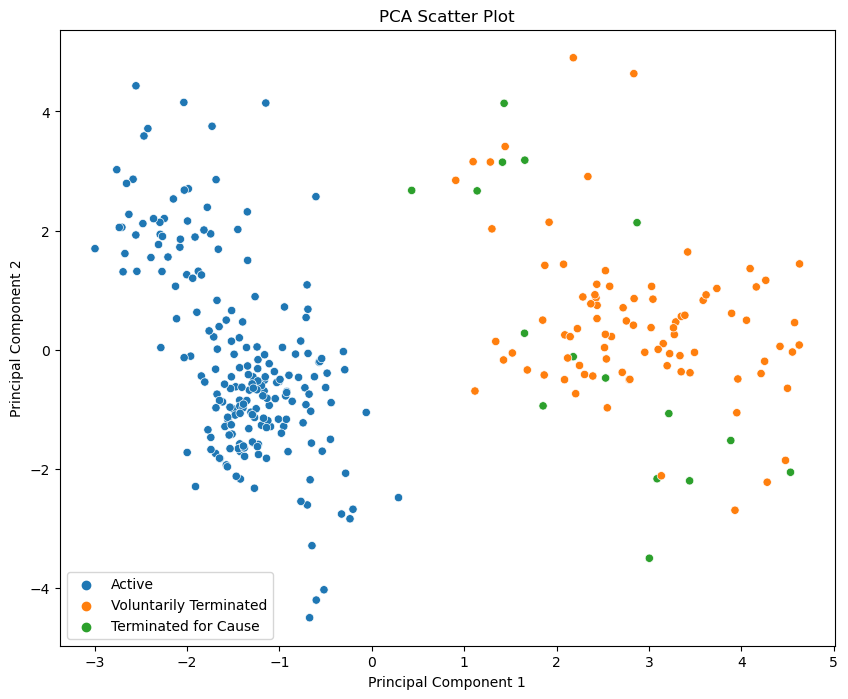

In [64]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=data['EmploymentStatus'])
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

As we see the employees who have still active are the most similiar to each others,than the employees who voluntarily terminated  (that also a little bit similar to one another )but who if we see the employees who terminated for cause they aren't similar at all.

In [65]:
feature_names = data_B1.drop(columns=['EmploymentStatus','EmpID']).columns


In [66]:
# Get the absolute values of the component loadings
component_loadings = pd.DataFrame(pca.components_, columns=feature_names)

# Iterate over the principal components and their loadings
for i, component in enumerate(component_loadings.index):
    print(f"Principal Component {i+1}:")
    sorted_loadings = component_loadings.loc[component].abs().sort_values(ascending=False)
    print(sorted_loadings)
    print()


Principal Component 1:
Termd                     0.440749
TerminationYear           0.440738
TerminationMonth          0.409413
TerminationDay            0.389624
TermReason                0.313887
YearsExperience           0.244474
SpecialProjectsCount      0.155334
DaysLateLast30            0.127439
RecruitmentSource         0.117148
PerformanceScore          0.112106
Salary                    0.106237
ManagerID                 0.103344
FromDiversityJobFairID    0.095787
Position                  0.094377
Department                0.075220
MaritalDesc               0.068866
Age                       0.067026
Absences                  0.060094
EngagementSurvey          0.056778
CitizenDesc               0.045159
EmpSatisfaction           0.040845
MarriedID                 0.034529
RaceDesc                  0.017382
Zip                       0.007298
HispanicLatino            0.006067
State                     0.005293
GenderID                  0.003891
Name: 0, dtype: float64

Princip

Which features are the most effective to separate the employees by their employment status? 

Principal Component 1:
termd,TerminationDay , TerminationDMonth and Terminationyear have the highest absolute loading, indicating that it strongly influences the separation of employees by employment status.These features, related to termination (the end of employment) ,it suggests that the time of termination and reasons for termination have a strong influence on the separation of employees.

Principal Component 2:
SpecialProjectsCount,ManagerID,Salary and Department have the highest absolute loadingalso here, suggesting that it is the most effective feature for separating employees by employment status in this component.These features,may have a significant role in differentiating employees based on their employment status.

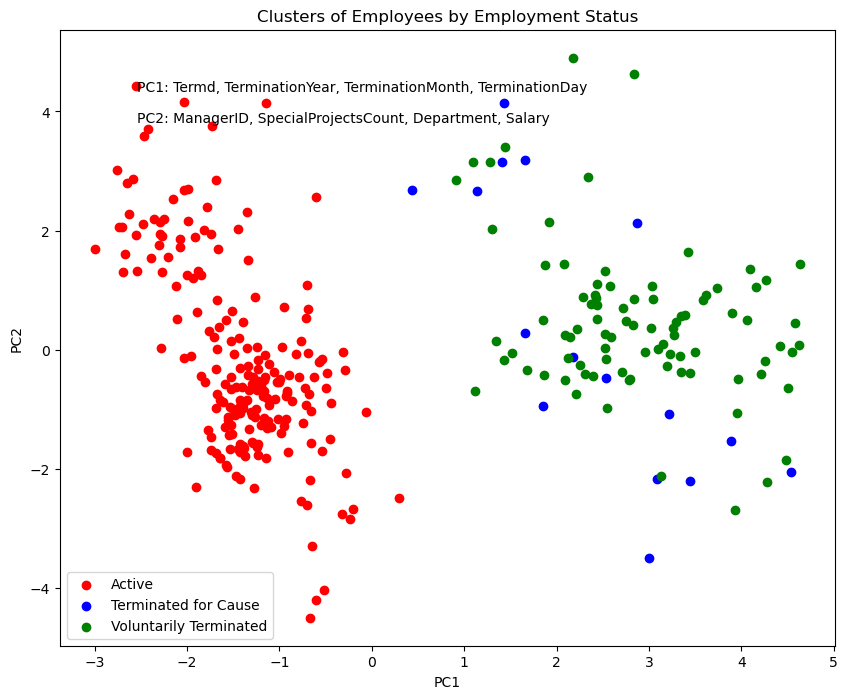

In [67]:
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['EmploymentStatus'] = data['EmploymentStatus']

# Plot the clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green'] 
labels = ['Active', 'Terminated for Cause', 'Voluntarily Terminated'] 

for label, color in zip(labels, colors):
    subset = pca_df[pca_df['EmploymentStatus'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=label)

# Display the feature importance
loadings = pd.DataFrame(pca.components_, columns=feature_names)
for i, component in enumerate(loadings.index):
    important_features = loadings.loc[component].abs().sort_values(ascending=False).index[:4]  
    feature_labels = ', '.join(important_features)
    plt.text(0.1, 0.9 - i * 0.05, f"PC{i+1}: {feature_labels}", transform=plt.gca().transAxes)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Employees by Employment Status')
plt.legend()
plt.show()


Which features are the least effective to separate the employees? 

We can see that the features with relatively lower loadings in both Principal Component 1 :
RaceDesc ,GenderID,HispanicLatino and State.These features may not have a significant impact on employment status separation as they relate to demographic information that might not directly affect the employmee status.and for the state feature it may not have a strong correlation with their employment status.

And for Principal Component 2 :
CitizenDesc,Zip,Age and State,this features may have less critical factors in determining employment status, and employee satisfaction and age might not be a strong distinguishing features for separation.

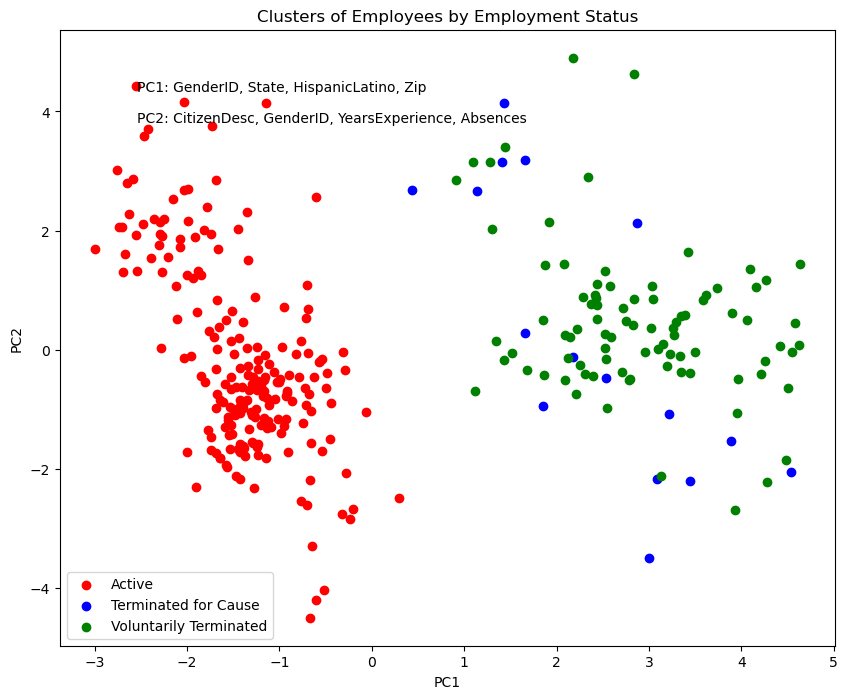

In [68]:
# Create a DataFrame with the PCA scores and employment status
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['EmploymentStatus'] = data['EmploymentStatus']

# Plot the clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green'] 
labels = ['Active', 'Terminated for Cause', 'Voluntarily Terminated'] 

for label, color in zip(labels, colors):
    subset = pca_df[pca_df['EmploymentStatus'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=label)

# Display the feature importance
loadings = pd.DataFrame(pca.components_, columns=feature_names)
for i, component in enumerate(loadings.index):
    least_important_features = loadings.loc[component].abs().sort_values(ascending=True).index[:4] 
    feature_labels = ', '.join(least_important_features)
    plt.text(0.1, 0.9 - i * 0.05, f"PC{i+1}: {feature_labels}", transform=plt.gca().transAxes)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Employees by Employment Status')
plt.legend()
plt.show()


In [69]:
data_B2 = data_B1.drop(['Termd','TerminationMonth','TerminationYear','TerminationDay'], axis=1)
data_B2=data_B2.drop(columns=['EmploymentStatus','EmpID'])
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_B2)


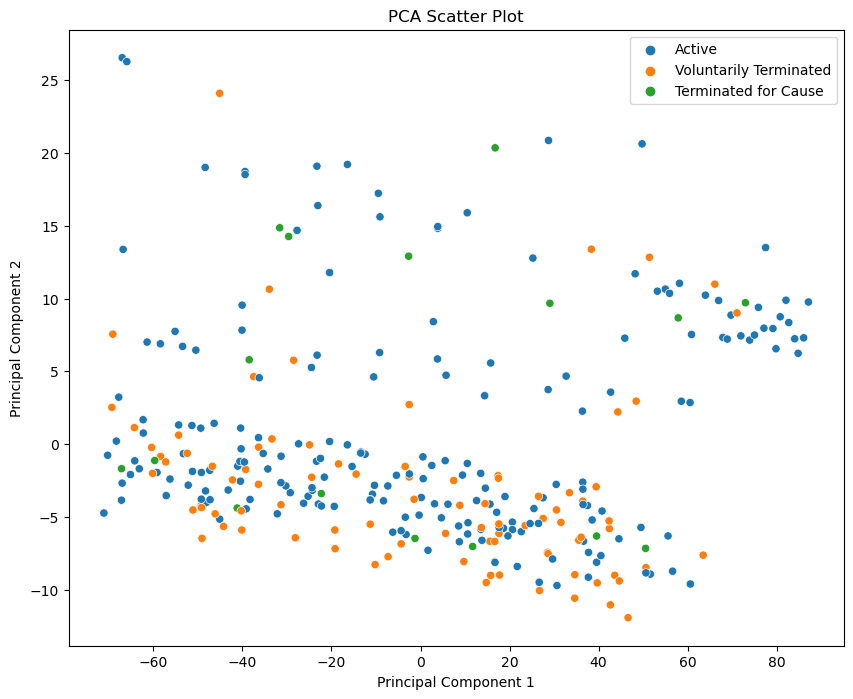

In [70]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['EmploymentStatus'])
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

After removing Termd and TerminationMonth,TerminationDay and TerminationYear, as we see from the graph the data is mixed (not seperated properly) ,we can't see the clusters properly. So we can conclude that this features seperated it in a good way.

The features that now are the most effective to separation:

In [71]:
loadings = pd.DataFrame(pca.components_, columns=data_B2.columns)

for i, component in enumerate(loadings.index):
    print(f"Principal Component {i+1}:")
    print(loadings.loc[component].sort_values(ascending=False))
    print()


Principal Component 1:
Zip                       0.997248
ManagerID                 0.019600
State                     0.015071
RecruitmentSource         0.004580
Department                0.004561
RaceDesc                  0.002890
MaritalDesc               0.002345
TermReason                0.001166
PerformanceScore          0.000951
EmpSatisfaction           0.000842
DaysLateLast30            0.000543
HispanicLatino            0.000483
Age                       0.000368
Absences                 -0.000008
EngagementSurvey         -0.000033
YearsExperience          -0.000055
GenderID                 -0.000089
Salary                   -0.000111
CitizenDesc              -0.000414
MarriedID                -0.000478
FromDiversityJobFairID   -0.000638
SpecialProjectsCount     -0.000789
Position                 -0.069460
Name: 0, dtype: float64

Principal Component 2:
SpecialProjectsCount      0.155822
State                     0.061687
RecruitmentSource         0.013095
GenderID           

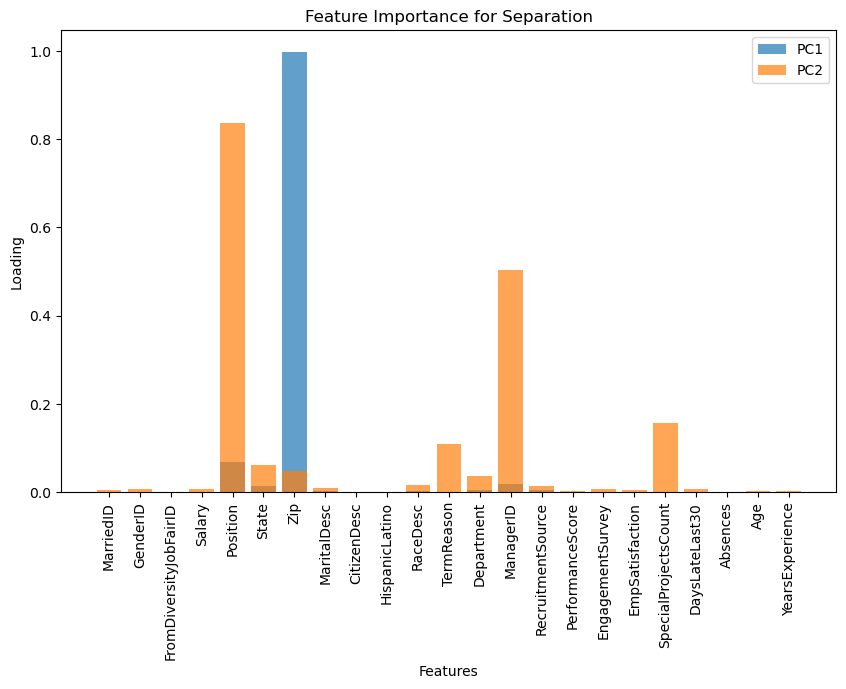

In [72]:
# Create a bar plot to visualize feature importance for separation
plt.figure(figsize=(10, 6))
plt.bar(data_B2.columns, np.abs(loadings.loc[0]), alpha=0.7, label='PC1')
plt.bar(data_B2.columns, np.abs(loadings.loc[1]), alpha=0.7, label='PC2')
plt.title('Feature Importance for Separation')
plt.xlabel('Features')
plt.ylabel('Loading')
plt.xticks(rotation=90)
plt.legend()
plt.show()


From what we got now the Zip the has the highest weight in the first principal component, this may till us that the "Zip" feature is a strong separator of the data in terms of employment status.

Additionally, in PC2, the feature Position has become the bes feature for separating the data,now it significance in distinguishing between different employment status groups.


Biplot using the first two principal components (PC1 and PC2).

In [73]:
x = StandardScaler().fit_transform(data_B1.drop(columns=['EmploymentStatus','EmpID']))
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(x)

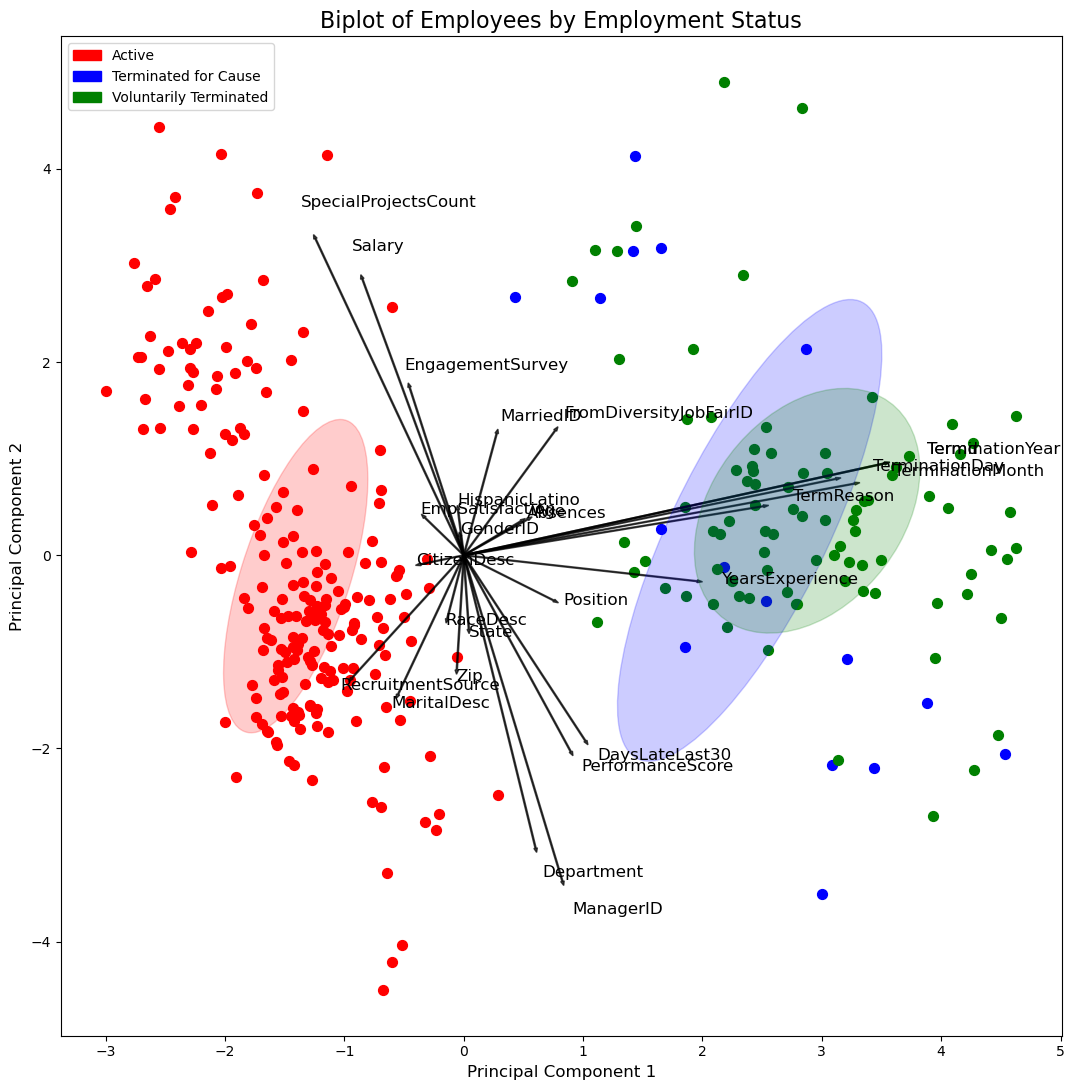

In [74]:
# Create a biplot
fig, ax = plt.subplots(figsize=(11, 11))

# Plot the data points
statuses = ['Active', 'Terminated for Cause', 'Voluntarily Terminated']
colors = ['red', 'blue', 'green']

for target, color in zip(statuses, colors):
    indicesToKeep = data_B1['EmploymentStatus'] == target
    ax.scatter(principal_components[indicesToKeep, 0], principal_components[indicesToKeep, 1],
               c=color, label=target, s=50)

# Plot the variable vectors
loadings = pca.components_.T
arrow_scale = 8
for i, feature_name in enumerate(data_B1.drop(columns=['EmploymentStatus','EmpID']).columns):
    ax.arrow(0, 0, loadings[i, 0]*arrow_scale, loadings[i, 1]*arrow_scale,
             color='black', alpha=0.7, width=0.01)
    ax.text(loadings[i, 0]*arrow_scale*1.1, loadings[i, 1]*arrow_scale*1.1,
            feature_name, color='black', fontsize=12)

# Add ellipses for each EmploymentStatus category
for target, color in zip(statuses, colors):
    indicesToKeep = data_B1['EmploymentStatus'] == target
    category_data = principal_components[indicesToKeep]
    mean_x = category_data[:, 0].mean()
    mean_y = category_data[:, 1].mean()
    cov_matrix = np.cov(category_data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[0][::-1]))
    ellipse = Ellipse((mean_x, mean_y), 2 * np.sqrt(eigenvalues[0]), 2 * np.sqrt(eigenvalues[1]),
                      angle=angle, color=color, alpha=0.2)
    ax.add_artist(ellipse)

# Set labels and title
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('Biplot of Employees by Employment Status', fontsize=16)

# Add legend and color guidelines
legend_labels = ['Active', 'Terminated for Cause', 'Voluntarily Terminated']
color_guidelines = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
ax.legend(handles=color_guidelines, loc='upper left')

# Adjust spacing
plt.tight_layout()

# Show the biplot
plt.show()


Outliers :

In the biplot, outliers can be identified by observing data points that are located far away from the center of the plot or in the direction of the vectors representing the variables. These points exhibit extreme values and deviate from the overall pattern of the data.

To identify outliers using the biplot, follow these steps:

We see the position of the data points in the biplot,the points that are located far away from the center of the plot or in the outer regions, and that align closely with a specific variable's vector may have extreme values in that variable.
so we print them and color them in the biplot in orange color.

In [75]:
distances = np.sqrt(np.sum(principal_components**2, axis=1))

# Set a threshold for outlier detection (e.g., 2 standard deviations from the mean distance)
threshold = np.mean(distances) + 2 * np.std(distances)

# Find the indices of the outliers
outlier_indices = np.where(distances > threshold)[0]

# Print the outliers
outliers = data_B1.loc[outlier_indices]
print("Outliers:")
print(outliers)


Outliers:
     EmpID  MarriedID  GenderID  FromDiversityJobFairID    Salary  Termd  \
11   10242          1         1                       1  0.010563      1   
53   10292          0         1                       0  0.068786      1   
72   10304          0         0                       0  0.069211      0   
105  10283          1         1                       1  0.048240      1   
112  10300          1         1                       1  0.116377      1   
137  10289          1         1                       0  0.185583      1   
150  10089          1         0                       0  1.000000      0   
188  10298          0         1                       0  0.052470      1   
205  10303          0         0                       0  0.037218      1   
214  10286          0         1                       0  0.041561      1   
244  10222          0         1                       1  0.507202      1   
259  10153          1         0                       1  0.048567      1   
30

In [76]:
outliers.head(8)

,EmpID,MarriedID,GenderID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,MaritalDesc,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,YearsExperience,TerminationDay,TerminationMonth,TerminationYear
11,10242,1,1,1,0.010563,1,22,10,52,1,...,4.20,3,0,0,0.736842,0.439024,0.538462,19,9,2016
53,10292,0,1,0,0.068786,1,22,10,30,3,...,2.00,3,0,5,0.789474,0.317073,0.538462,23,9,2016
72,10304,0,0,0,0.069211,0,2,27,157,3,...,2.30,1,0,2,0.842105,0.121951,0.538462,0,0,0
105,10283,1,1,1,0.048240,1,22,10,52,1,...,3.97,4,0,3,0.736842,0.439024,0.538462,25,6,2015
112,10300,1,1,1,0.116377,1,23,10,69,1,...,3.00,3,0,3,0.473684,0.682927,0.692308,30,5,2011
137,10289,1,1,0,0.185583,1,21,10,69,1,...,2.34,2,0,3,0.157895,0.390244,0.615385,24,9,2012
150,10089,1,0,0,1.000000,0,19,10,35,1,...,4.83,3,0,0,0.473684,0.926829,0.461538,0,0,0
188,10298,0,1,0,0.052470,1,23,10,114,3,...,3.00,2,0,6,0.263158,0.170732,0.538462,4,9,2014


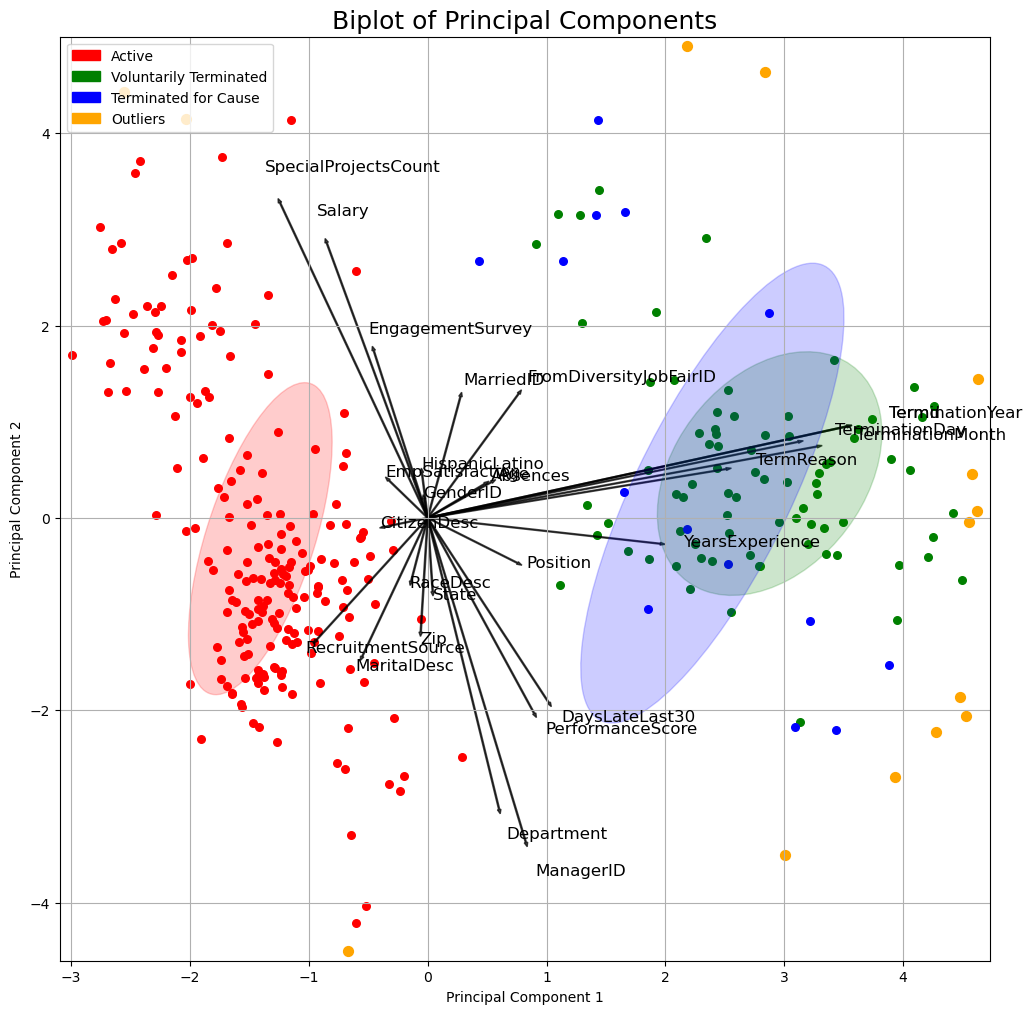

In [77]:
fig, ax = plt.subplots(figsize=(12, 12))

# Set limits for the plot
x_min = np.min(principal_components[:, 0])
x_max = np.max(principal_components[:, 0])
y_min = np.min(principal_components[:, 1])
y_max = np.max(principal_components[:, 1])
ax.set_xlim(x_min - 0.1, x_max + 0.1)
ax.set_ylim(y_min - 0.1, y_max + 0.1)

# Plot the data points
statuses = ['Active', 'Voluntarily Terminated', 'Terminated for Cause']
colors = ['r', 'g', 'b']

# Identify and color the outliers
outlier_indices = np.where(distances > threshold)[0]
for target, color in zip(statuses, colors):
    indicesToKeep = data['EmploymentStatus'] == target
    ax.scatter(principal_components[indicesToKeep, 0], principal_components[indicesToKeep, 1], c=color, s=30)
    
# Color the outliers in a different color
ax.scatter(principal_components[outlier_indices, 0], principal_components[outlier_indices, 1], c='orange', s=50, label='Outliers')

# Plot the variable vectors
arrow_scale = 8
for i, feature_name in enumerate(data_B1.drop(columns=['EmploymentStatus','EmpID']).columns):
    ax.arrow(0, 0, loadings[i, 0]*arrow_scale, loadings[i, 1]*arrow_scale,
             color='black', alpha=0.7, width=0.01)
    ax.text(loadings[i, 0]*arrow_scale*1.1, loadings[i, 1]*arrow_scale*1.1,
            feature_name, color='black', fontsize=12)

# Add ellipses for each EmploymentStatus category
for target, color in zip(statuses, colors):
    indicesToKeep = data['EmploymentStatus'] == target
    category_data = principal_components[indicesToKeep]
    mean_x = category_data[:, 0].mean()
    mean_y = category_data[:, 1].mean()
    cov_matrix = np.cov(category_data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[0][::-1]))
    ellipse = Ellipse((mean_x, mean_y), 2 * np.sqrt(eigenvalues[0]), 2 * np.sqrt(eigenvalues[1]),
                      angle=angle, color=color, alpha=0.2)
    ax.add_artist(ellipse)

# Set labels and title
ax.set_xlabel('Principal Component 1', fontsize=10)
ax.set_ylabel('Principal Component 2', fontsize=10)
ax.set_title('Biplot of Principal Components', fontsize=18)

# Add gridlines
ax.grid()

# Add legend and color guidelines
legend_labels = ['Active', 'Voluntarily Terminated', 'Terminated for Cause', 'Outliers']
color_guidelines = [Patch(color=color, label=label) for color, label in zip(colors + ['orange'], legend_labels)]
ax.legend(handles=color_guidelines, loc='upper left')

# Show the biplot
plt.show()


As we see there are features that they have values in common such as MarriedID, GenderID and DaysLateLast30.

<h3>Section C (Classification) </h3>

In [78]:
data_C=data
data_C=data_C.drop(columns=['DateofTermination','LastPerformanceReview_Date'])

In [79]:
data_C.columns

Index(['EmpID', 'MarriedID', 'GenderID', 'FromDiversityJobFairID', 'Salary',
       'Termd', 'Position', 'State', 'Zip', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'Age', 'YearsExperience',
       'TerminationDay', 'TerminationMonth', 'TerminationYear'],
      dtype='object')

In [80]:
X = data_C.drop('EmploymentStatus', axis=1)  # Features
y = data_C['EmploymentStatus']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)
X_train=X_train.drop(columns=["EmpID"])
X_test=X_test.drop(columns=["EmpID"])

In [81]:
X_train

,MarriedID,GenderID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,MaritalDesc,CitizenDesc,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,YearsExperience,TerminationDay,TerminationMonth,TerminationYear
238,1,0,0,0.218766,0,6,10,31,1,2,...,3.69,5,6,0,0.736842,0.268293,0.307692,0,0,0
211,1,0,0,0.090113,1,22,10,102,1,2,...,3.89,4,0,0,0.315789,0.317073,0.615385,12,1,2014
58,0,0,0,0.054173,0,22,10,23,3,2,...,4.12,5,0,0,0.736842,0.121951,0.153846,0,0,0
285,0,1,1,0.270158,1,27,10,108,3,1,...,4.60,3,4,0,0.421053,0.219512,0.461538,15,4,2018
75,1,0,0,0.124784,0,17,10,62,1,2,...,4.11,4,6,0,0.789474,0.097561,0.307692,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1,1,0,0.234980,0,31,10,86,1,2,...,4.46,5,6,0,0.315789,0.146341,0.307692,0,0,0
123,0,1,0,0.093680,0,23,10,85,3,2,...,5.00,3,0,0,1.000000,0.097561,0.384615,0,0,0
15,0,1,0,0.062394,1,22,10,49,3,2,...,5.00,4,0,0,1.000000,0.268293,0.615385,4,8,2017
125,1,0,0,0.083038,0,22,10,31,1,2,...,4.76,4,0,0,0.210526,0.439024,0.384615,0,0,0


<h3>SVM</h3>

In [82]:
# Create an SVM classifier
svm_model = SVC()

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best = grid_search.best_estimator_
# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

,C,gamma,kernel
Selected Value,0.1,0.1,linear


SVM model don't provide feature importances like some other machine learning algorithms (it make use of support vectors and decision boundaries to classify data).
But, we analyze the coefficients of the support vectors,coefficients represent the contribution of each feature in determining the decision boundary,Features with larger coefficients have a stronger influence on the classification.

In [83]:
y_pred = best.predict(X_test)
y_pred

array(['Active', 'Active', 'Terminated for Cause',
       'Voluntarily Terminated', 'Active', 'Voluntarily Terminated',
       'Active', 'Voluntarily Terminated', 'Active',
       'Voluntarily Terminated', 'Active', 'Active',
       'Voluntarily Terminated', 'Voluntarily Terminated',
       'Voluntarily Terminated', 'Voluntarily Terminated', 'Active',
       'Voluntarily Terminated', 'Active', 'Voluntarily Terminated',
       'Active', 'Voluntarily Terminated', 'Active', 'Active', 'Active',
       'Active', 'Active', 'Active', 'Active', 'Voluntarily Terminated',
       'Active', 'Voluntarily Terminated', 'Active', 'Active', 'Active',
       'Active', 'Terminated for Cause', 'Active', 'Terminated for Cause',
       'Active', 'Active', 'Terminated for Cause',
       'Voluntarily Terminated', 'Active', 'Terminated for Cause',
       'Active', 'Voluntarily Terminated', 'Active', 'Active', 'Active',
       'Active', 'Voluntarily Terminated', 'Voluntarily Terminated',
       'Voluntarily Ter

In [84]:
classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']
# Compute accuracy
accuracy_Svm = accuracy_score(y_test, y_pred)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute sensitivity (true positive rate) for each class
sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

# Compute specificity (true negative rate) for each class
specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

print("Accuracy:", accuracy_Svm)
for i in range(confusion_mat.shape[0]):
    print(classes[i],"class ,Sensitivity:", sensitivity[i])
    print(classes[i],"class ,Specificity:", specificity[i])


Accuracy: 0.925531914893617
Active class ,Sensitivity: 1.0
Active class ,Specificity: 1.0
Terminated for Cause class ,Sensitivity: 0.5
Terminated for Cause class ,Specificity: 0.9444444444444444
Voluntarily Terminated  class ,Sensitivity: 0.8275862068965517
Voluntarily Terminated  class ,Specificity: 0.9692307692307692


As we see "Terminated for Cause" class has a relatively low sensitivity, which means that the model did not correctly identify the instances of this class, this may  suggests that the model is performing poorly in detecting employees who are likely to Terminated for Cause.
It may beacause the class is not balance, the dataset may have an imbalance between the number of samples in the "Terminated for Cause" class and the other classes.

In [85]:
#So oversampling to address class imbalance
ros = RandomOverSampler(random_state=RSEED)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create an SVM classifier
svm_model = SVC()

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=10)
grid_search.fit(X_train_resampled, y_train_resampled)
best = grid_search.best_estimator_

# Print the best parameters
best_params = pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T
print(best_params)


                C gamma  kernel
Selected Value  1   0.1  linear


In [86]:
y_pred = best.predict(X_test)
classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']
# Compute accuracy
accuracy_Svm = accuracy_score(y_test, y_pred)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute sensitivity (true positive rate) for each class
sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

# Compute specificity (true negative rate) for each class
specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

print("Accuracy:", accuracy_Svm)
for i in range(confusion_mat.shape[0]):
    print(classes[i],"class ,Sensitivity:", sensitivity[i])
    print(classes[i],"class ,Specificity:", specificity[i])


Accuracy: 0.925531914893617
Active class ,Sensitivity: 1.0
Active class ,Specificity: 1.0
Terminated for Cause class ,Sensitivity: 0.75
Terminated for Cause class ,Specificity: 0.9333333333333333
Voluntarily Terminated  class ,Sensitivity: 0.7931034482758621
Voluntarily Terminated  class ,Specificity: 0.9846153846153847


So oversampling has improved the sensitivity and specificity for the "Terminated for Cause" and for the "Voluntarily Terminated" class, while the performance for the "Active" class remains the same.

<h3>Random Forest</h3>

In [87]:
rf = RandomForestClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'max_depth': [2,5,10],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'n_estimators': [20, 50, 80]
}

grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

In [88]:
# fit estimator
grid_search.fit(X_train, y_train)

# get best estimator
best = grid_search.best_estimator_

In [89]:
y_pred = best.predict(X_test)

In [90]:
classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']

# Compute accuracy
accuracy_RandomForest = accuracy_score(y_test, y_pred)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute sensitivity (true positive rate) for each class
sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

# Compute specificity (true negative rate) for each class
specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

# Display the results
print("Accuracy:", accuracy_RandomForest)
for i in range(confusion_mat.shape[0]):
    print(classes[i]," class ,Sensitivity:", sensitivity[i])
    print(classes[i]," class ,Specificity:", specificity[i])


Accuracy: 0.925531914893617
Active  class ,Sensitivity: 1.0
Active  class ,Specificity: 1.0
Terminated for Cause  class ,Sensitivity: 0.0
Terminated for Cause  class ,Specificity: 0.9666666666666667
Voluntarily Terminated   class ,Sensitivity: 0.896551724137931
Voluntarily Terminated   class ,Specificity: 0.9384615384615385


As we see, the model performs well in predicting the "Active" and "Voluntarily Terminated" classes with high sensitivity and specificity. However, it struggles to predict the Terminated for Cause class, as indicated by the low sensitivity (0.0). This suggests that the model has difficulty identifying true positive instances of the Terminated for Cause class.

To improve that adding class weights->different weights to each class in the model to account for class imbalance,higher weights to the minority class (Terminated for Cause) and lower weights to the majority classes (Active and Voluntarily Terminated), so we can make the model more sensitive to the minority class.

In [91]:
# Define class weights
class_weights = {
    'Active': 1,
    'Terminated for Cause': 5,
    'Voluntarily Terminated': 1, 
}

# Create the Random Forest Classifier with class weights
rf = RandomForestClassifier(random_state=RSEED, class_weight=class_weights)

# Define parameter grid
parameters_grid = {
    'max_depth': [2, 5, 7],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [2, 4, 8],
    'n_estimators': [20,40, 50]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_taken = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_taken.predict(X_test)


In [92]:
accuracy_RandomForest_this = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)

sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

print("Accuracy:", accuracy_RandomForest_this)
for i in range(confusion_mat.shape[0]):
    print(classes[i], "class, Sensitivity:", sensitivity[i])
    print(classes[i], "class, Specificity:", specificity[i])


Accuracy: 0.925531914893617
Active class, Sensitivity: 1.0
Active class, Specificity: 1.0
Terminated for Cause class, Sensitivity: 0.25
Terminated for Cause class, Specificity: 0.9555555555555556
Voluntarily Terminated  class, Sensitivity: 0.8620689655172413
Voluntarily Terminated  class, Specificity: 0.9538461538461539


As we see now the Sensitivity for Terminated for Cause class have imporved,so the class weights really help us for the prediction, and the accuracy didnt change,but Voluntarily Terminated class the Sensitivity  now a little bit decrased.
Also oversampling and we dont get better results:

In [93]:
rf = RandomForestClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'max_depth': [2,5,10],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'n_estimators': [20, 50, 80]
}

grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_train_resampled, y_train_resampled)#resampled

# get best estimator
best_rf = grid_search.best_estimator_

y_pred = best.predict(X_test)

classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']

# Compute accuracy
accuracy_RandomForest = accuracy_score(y_test, y_pred)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute sensitivity (true positive rate) for each class
sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

# Compute specificity (true negative rate) for each class
specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

# Display the results
print("Accuracy:", accuracy_RandomForest)
for i in range(confusion_mat.shape[0]):
    print(classes[i]," class ,Sensitivity:", sensitivity[i])
    print(classes[i]," class ,Specificity:", specificity[i])


Accuracy: 0.925531914893617
Active  class ,Sensitivity: 1.0
Active  class ,Specificity: 1.0
Terminated for Cause  class ,Sensitivity: 0.0
Terminated for Cause  class ,Specificity: 0.9666666666666667
Voluntarily Terminated   class ,Sensitivity: 0.896551724137931
Voluntarily Terminated   class ,Specificity: 0.9384615384615385


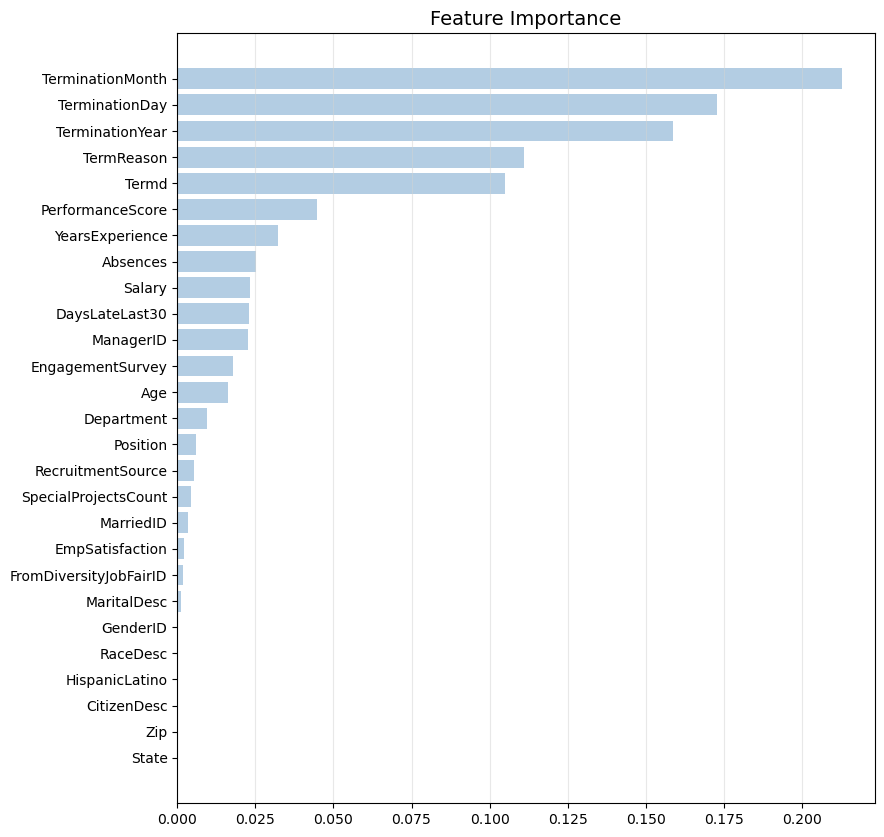

In [94]:
imp = pd.DataFrame(best_rf_taken.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')#we take the best one-best_rf_taken
# plot feature importance
plt.figure(figsize=(9, 10))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

<h3>Gradient Boosting</h3>

In [95]:
gb = GradientBoostingClassifier(random_state=RSEED)

parameters_grid = {
     'learning_rate': [0.1,0.2, 0.5,1],
    'n_estimators': [10,20,30,40,50, 100]
}

grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


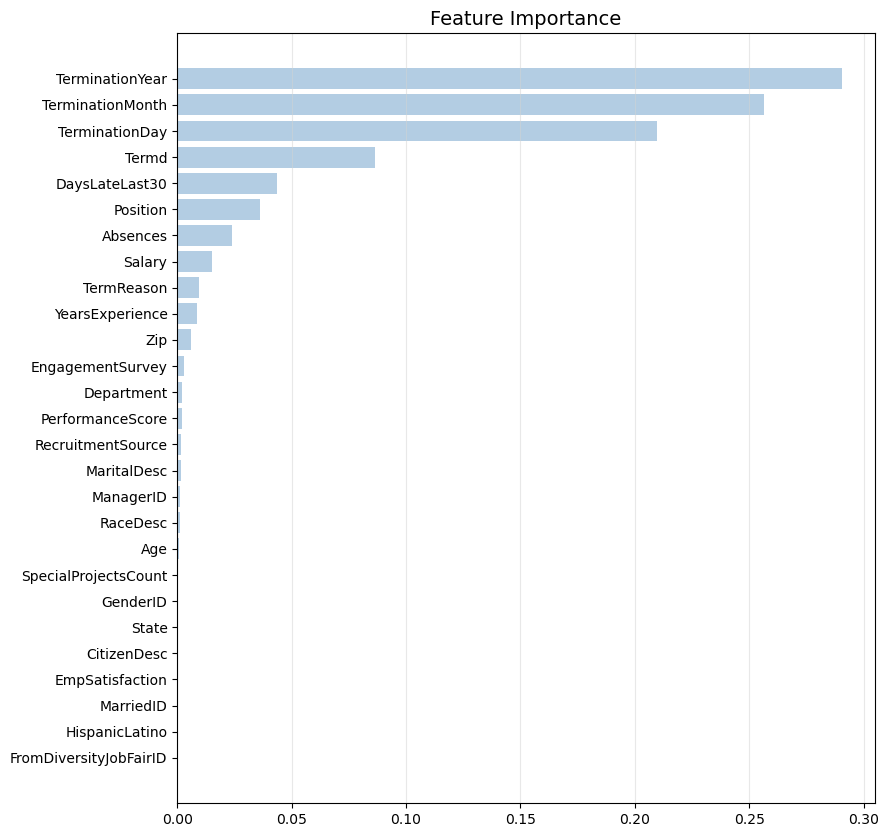

In [96]:
imp = pd.DataFrame(best_estimator.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(9, 10))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

In [97]:
y_pred = best_estimator.predict(X_test)

In [98]:
classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']

accuracy_grboost = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)

sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

print("Accuracy:", accuracy_grboost)
for i in range(confusion_mat.shape[0]):
    print(classes[i]," class ,Sensitivity:", sensitivity[i])
    print(classes[i]," class ,Specificity:", specificity[i])


Accuracy: 0.9680851063829787
Active  class ,Sensitivity: 1.0
Active  class ,Specificity: 1.0
Terminated for Cause  class ,Sensitivity: 0.5
Terminated for Cause  class ,Specificity: 0.9888888888888889
Voluntarily Terminated   class ,Sensitivity: 0.9655172413793104
Voluntarily Terminated   class ,Specificity: 0.9692307692307692


This model seems to perform well overall, with high accuracy and very good performance in classifying the Active and Voluntarily Terminated classes. but here also the Terminated for Cause class has sensitivity low relatively,(beacuse we have see that the Terminated for Cause has very low samples in our traing data so when it come to test it can predict very much good beacuse it havent train much for this class)

<h3>KNN</h3>

In [99]:
knn = KNeighborsClassifier()

# Define the parameter grid
parameters_grid = {
    'n_neighbors': [1, 2, 3, 4,5,6],
    'weights': ['uniform', 'distance'],
    'p': [1,2,3,4]
}

# Define the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid, cv=10)

# Fit the estimator
grid_search.fit(X_train, y_train)

# Get the best estimator
best_knn = grid_search.best_estimator_


In [100]:
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

,n_neighbors,p,weights
Selected Value,3,1,uniform


In [101]:
y_pred = best_knn.predict(X_test)


In [102]:
classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']

accuracy_knn = accuracy_score(y_test, y_pred)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute sensitivity (true positive rate) for each class
sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

# Compute specificity (true negative rate) for each class
specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

# Display the results
print("Accuracy:", accuracy_knn)
for i in range(confusion_mat.shape[0]):
    print(classes[i]," class ,Sensitivity:", sensitivity[i])
    print(classes[i]," class ,Specificity:", specificity[i])


Accuracy: 0.925531914893617
Active  class ,Sensitivity: 1.0
Active  class ,Specificity: 1.0
Terminated for Cause  class ,Sensitivity: 0.0
Terminated for Cause  class ,Specificity: 0.9666666666666667
Voluntarily Terminated   class ,Sensitivity: 0.896551724137931
Voluntarily Terminated   class ,Specificity: 0.9384615384615385


In knn also we can see that it performs well in classifying the Active class, with perfect sensitivity and specificity. However,  in Terminated for Cause class samples , there is low sensitivity.So here we will do undersampling: reduce the number of instances in the majority class to match the minority class-Random Under-sampling

In [103]:
# Apply Random Under-sampling
undersampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

knn = KNeighborsClassifier()

# Define the parameter grid
parameters_grid = {
    'n_neighbors': [1, 2, 3, 4,5,6],
    'weights': ['uniform', 'distance'],
    'p': [1,2,3,4]
}

# Define the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid, cv=10)

# Fit the estimator
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_knn = grid_search.best_estimator_


In [104]:
y_pred = best_knn.predict(X_test)


In [105]:
classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']

accuracy_knn = accuracy_score(y_test, y_pred)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute sensitivity (true positive rate) for each class
sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

# Compute specificity (true negative rate) for each class
specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

# Display the results
print("Accuracy:", accuracy_knn)
for i in range(confusion_mat.shape[0]):
    print(classes[i]," class ,Sensitivity:", sensitivity[i])
    print(classes[i]," class ,Specificity:", specificity[i])


Accuracy: 0.776595744680851
Active  class ,Sensitivity: 1.0
Active  class ,Specificity: 1.0
Terminated for Cause  class ,Sensitivity: 0.75
Terminated for Cause  class ,Specificity: 0.7777777777777778
Voluntarily Terminated   class ,Sensitivity: 0.3103448275862069
Voluntarily Terminated   class ,Specificity: 0.9846153846153847


We see that after applying undersampling, the overall accuracy of the classifier decreased, While the sensitivity and specificity for the majority class Active remained the same, there were changes in the sensitivity and specificity for the minority classes Terminated for Cause and Voluntarily Terminated.

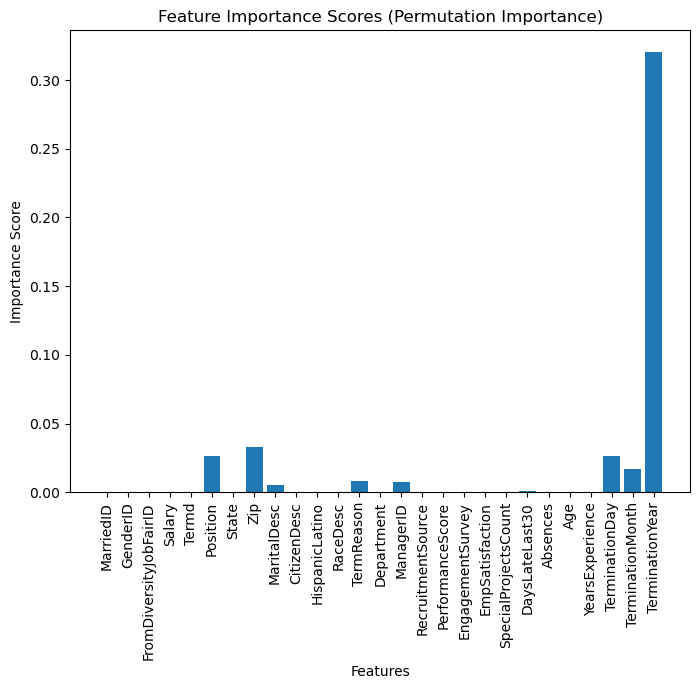

In [106]:
# Calculate permutation importance
result = permutation_importance(grid_search, X_test, y_test, n_repeats=10, random_state=RSEED)

# Get the feature importance scores
importance_scores = result.importances_mean

# Get the names of the features
feature_names = X_train.columns

# Plot the feature importance scores
plt.figure(figsize=(8, 6))
plt.bar(feature_names, importance_scores)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Permutation Importance)')
plt.show()


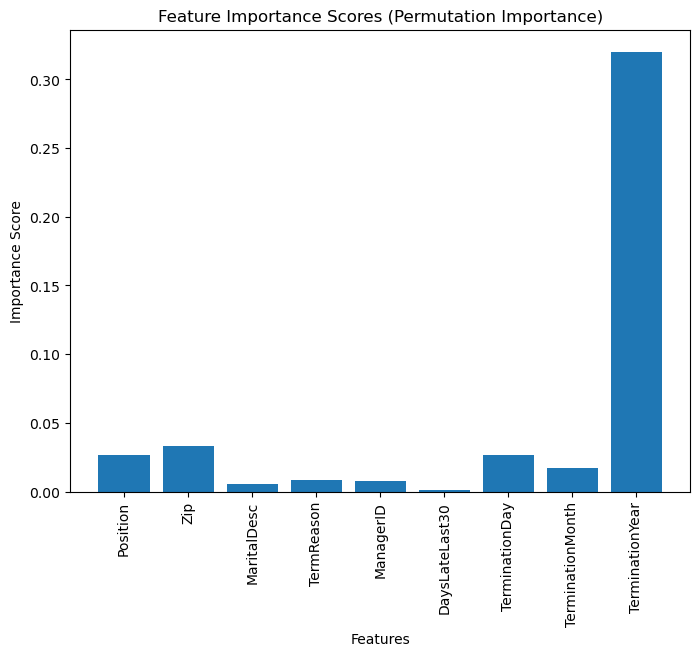

In [107]:
# Calculate permutation importance
result = permutation_importance(grid_search, X_test, y_test, n_repeats=10, random_state=RSEED)

# Get the feature importance scores
importance_scores = result.importances_mean

# Get the names of the features
feature_names = X_train.columns

# Plot the feature importance scores
plt.figure(figsize=(8, 6))
plt.bar(feature_names[importance_scores > 0], importance_scores[importance_scores > 0])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Permutation Importance)')
plt.show()


<h3>AdaBoostClassifier</h3>

Handling class imbalancet with oversampling 

In [108]:
#pip install imbalanced-learn
# Perform oversampling to address class imbalance
ros = RandomOverSampler(random_state=RSEED)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create an AdaBoost classifier
gb = AdaBoostClassifier(random_state=RSEED)

# Define the parameter grid
parameters_grid = {
    'learning_rate': [0.7, 0.8, 0.9, 1.0, 1.1],
    'n_estimators': [10, 11, 12, 13, 14, 15],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Define the grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

# Fit the estimator
grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=10),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.7, 0.8, 0.9, 1.0, 1.1],
                         'n_estimators': [10, 11, 12, 13, 14, 15]})

In [109]:
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

,algorithm,learning_rate,n_estimators
Selected Value,SAMME,1.1,15


In [110]:
best_tree_ada = grid_search.best_estimator_

best_tree_ada

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.1, n_estimators=15,
                   random_state=10)

In [111]:
y_pred = best_tree_ada.predict(X_test)


In [112]:
classes=['Active' ,'Terminated for Cause','Voluntarily Terminated ']

# Compute accuracy
accuracy_ada = accuracy_score(y_test, y_pred)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute sensitivity (true positive rate) for each class
sensitivity = []
for i in range(confusion_mat.shape[0]):
    tp = confusion_mat[i, i]
    fn = sum(confusion_mat[i, :]) - tp
    sensitivity_class = tp / (tp + fn)
    sensitivity.append(sensitivity_class)

# Compute specificity (true negative rate) for each class
specificity = []
for i in range(confusion_mat.shape[0]):
    tn = sum(confusion_mat.diagonal()) - confusion_mat[i, i]
    fp = sum(confusion_mat[:, i]) - confusion_mat[i, i]
    specificity_class = tn / (tn + fp)
    specificity.append(specificity_class)

# Display the results
print("Accuracy:", accuracy_ada)
for i in range(confusion_mat.shape[0]):
    print(classes[i]," class ,Sensitivity:", sensitivity[i])
    print(classes[i]," class ,Specificity:", specificity[i])


Accuracy: 0.9574468085106383
Active  class ,Sensitivity: 1.0
Active  class ,Specificity: 1.0
Terminated for Cause  class ,Sensitivity: 1.0
Terminated for Cause  class ,Specificity: 0.9555555555555556
Voluntarily Terminated   class ,Sensitivity: 0.8620689655172413
Voluntarily Terminated   class ,Specificity: 1.0


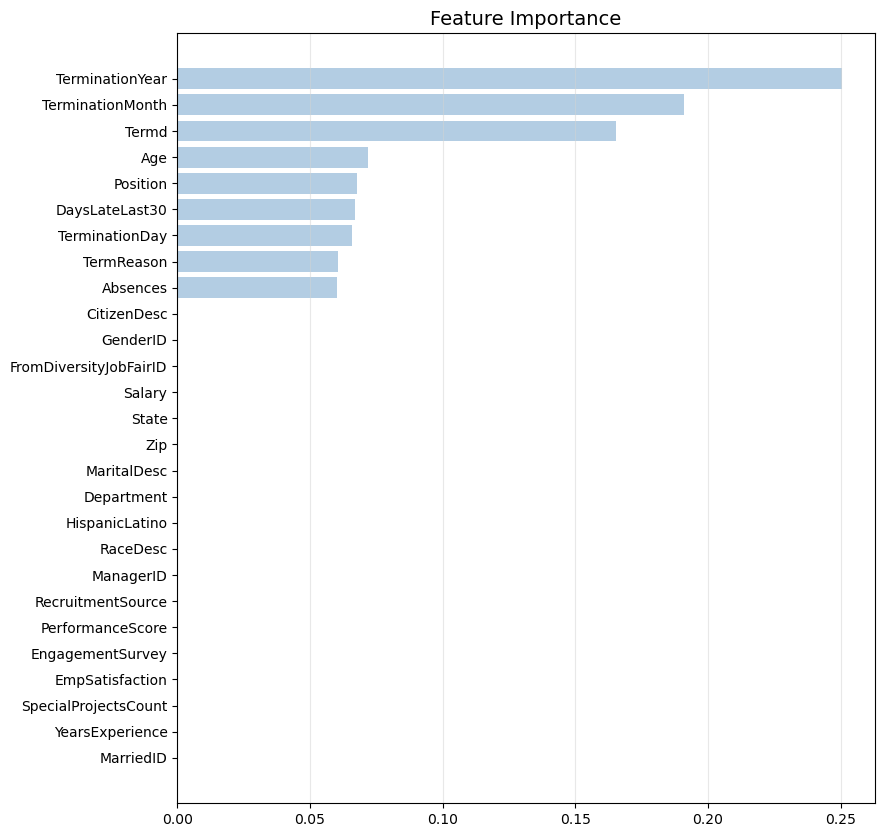

In [113]:
imp = pd.DataFrame(best_tree_ada.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(9, 10))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

In Adaboost also we can see that it performs well in classifying the Active class, with perfect sensitivity and specificity. However, it struggles with correctly identife samples in the Terminated for Cause class, as we see by low sensitivity. The model performs relatively better in classifying the Voluntarily Terminated class.


Comparing the performance results between the models:

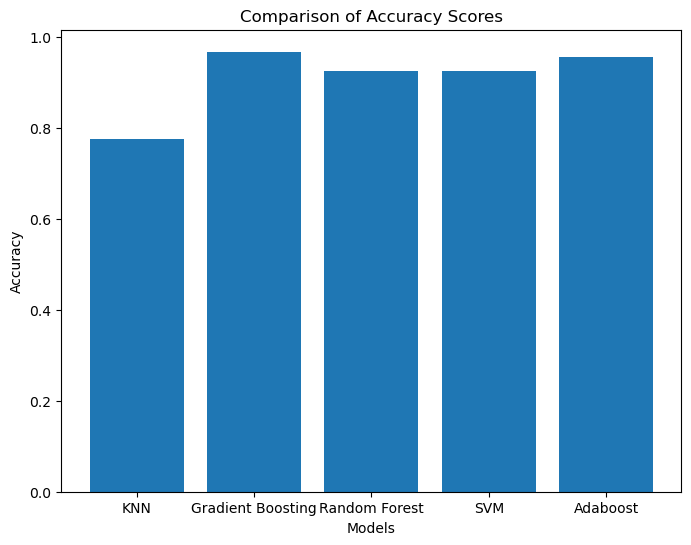

In [114]:
models = ['KNN', 'Gradient Boosting', 'Random Forest', 'SVM','Adaboost']
accuracy_scores = [accuracy_knn,accuracy_grboost, accuracy_RandomForest_this, accuracy_Svm,accuracy_ada]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.show()


<h2>Section D (Regression) </h2>

In [115]:
def get_metrics(y_test, y_pred):
    
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # get confusion matrix
    mat = metrics.confusion_matrix(y_test, y_pred)
    true_neg, false_pos, false_neg, true_pos = mat.ravel()
    
    # calculate sensitivity and specificity
    sensitivity = round(true_pos / np.sum(actual_pos), 3)
    specificity = round(true_neg / np.sum(actual_neg), 3)
    
    return sensitivity, specificity

In [116]:
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data_D = data[data['DateofTermination'] != pd.Timestamp('1900-01-01 00:00:00')]


In [117]:
data_D=data_D.drop(columns=['EmpID','Termd'])

In [118]:
data_D['LastPerformanceReview_Date'] = pd.to_datetime(data_D['LastPerformanceReview_Date'])

# Calculate TimeUntilTermination based on DateofTermination
data_D['TimeUntilTermination'] = (data_D['DateofTermination'] - data_D['LastPerformanceReview_Date']).dt.days
data_D=data_D.drop(columns=["DateofTermination","LastPerformanceReview_Date","TerminationDay","TerminationMonth","TerminationYear"])

In [119]:
label_encoder = LabelEncoder()
data_D['EmploymentStatus'] = label_encoder.fit_transform(data_D['EmploymentStatus'])

In [120]:
X=data_D.drop(columns=["TimeUntilTermination"])
y = data_D['TimeUntilTermination']

In [121]:
#Scaling the x (train and test)
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)
X = (X - min_vals) / (max_vals - min_vals)


In [122]:
X

,MarriedID,GenderID,FromDiversityJobFairID,Salary,Position,State,Zip,MaritalDesc,CitizenDesc,HispanicLatino,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,YearsExperience
1,1.0,1.0,0.0,0.571041,1.000000,0.285714,0.560284,0.25,1.0,0.0,...,0.136364,0.500,0.333333,0.986667,0.333333,0.857143,0.000000,0.842105,0.400,0.000000
2,1.0,0.0,0.0,0.190982,0.758621,0.285714,0.141844,0.25,1.0,0.0,...,0.818182,0.625,0.333333,0.340000,0.333333,0.000000,0.000000,0.105263,0.075,0.428571
4,0.0,0.0,0.0,0.054965,0.724138,0.285714,0.595745,0.00,1.0,0.0,...,1.000000,0.375,0.333333,1.000000,0.666667,0.000000,0.000000,0.052632,0.050,0.428571
10,1.0,0.0,1.0,0.091978,0.724138,0.285714,0.234043,0.25,1.0,1.0,...,0.545455,0.125,0.333333,0.733333,0.666667,0.000000,0.000000,0.578947,0.425,0.571429
11,1.0,1.0,1.0,0.020176,0.724138,0.285714,0.354610,0.25,1.0,1.0,...,0.818182,0.125,0.333333,0.733333,0.333333,0.000000,0.000000,0.736842,0.425,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1.0,1.0,0.0,0.096502,0.724138,0.285714,0.680851,0.25,0.0,0.0,...,0.409091,1.000,0.333333,1.000000,0.333333,0.000000,0.000000,0.315789,0.650,0.571429
302,0.0,0.0,0.0,0.124629,0.724138,0.285714,0.191489,0.00,1.0,0.0,...,0.772727,0.375,0.333333,0.533333,1.000000,0.000000,0.000000,0.421053,0.200,0.571429
303,0.0,0.0,1.0,0.140667,0.724138,0.285714,0.411348,0.75,1.0,1.0,...,0.772727,0.125,0.333333,0.766667,0.666667,0.000000,0.000000,0.789474,0.550,0.428571
304,0.0,1.0,0.0,0.244426,0.758621,0.285714,0.319149,0.75,1.0,0.0,...,0.454545,0.625,0.000000,1.000000,0.333333,0.000000,0.000000,0.315789,0.825,0.285714


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [124]:
data_D.iloc[95]

MarriedID                   1.000000
GenderID                    0.000000
FromDiversityJobFairID      0.000000
Salary                      0.023064
Position                   22.000000
State                      10.000000
Zip                       122.000000
MaritalDesc                 1.000000
CitizenDesc                 2.000000
HispanicLatino              0.000000
RaceDesc                    5.000000
TermReason                  6.000000
EmploymentStatus            0.000000
Department                  3.000000
ManagerID                  16.000000
RecruitmentSource           3.000000
PerformanceScore            0.000000
EngagementSurvey            4.300000
EmpSatisfaction             5.000000
SpecialProjectsCount        0.000000
DaysLateLast30              0.000000
Absences                    0.894737
Age                         0.146341
YearsExperience             0.538462
TimeUntilTermination      372.000000
Name: 293, dtype: float64

We will drop this raw beacuse LastPerformanceReview_Date >DateofTermination ,this not make sense.

In [125]:
y_test=y_test.drop(95)
X_test=X_test.drop(95)

In [126]:
y_test

265    119
127    139
163    413
161     54
249    194
147    390
205     53
244    304
10     348
146     58
4      218
151     95
49     249
211    314
157    300
80      58
2      132
296      0
242     42
227    483
293    372
221    284
136     59
175    178
233      0
297    361
292      7
226     77
256      6
217     25
277     81
Name: TimeUntilTermination, dtype: int64

In [127]:
##store the LastPerformanceReview_Date for our test data 
row_numbers = [265, 127, 163, 161, 249, 147, 205, 244, 10, 146, 4, 151, 49, 211, 157, 80, 2, 296, 242, 227, 293, 221, 136, 175, 233, 297, 292, 226, 256, 217, 277]
last_performance_review_dates = data.loc[row_numbers, 'LastPerformanceReview_Date']
last_performance_review_dates = pd.to_datetime(last_performance_review_dates)

In [128]:
def show_regresion_error(predictions, true_values):
    df_predict = pd.DataFrame(predictions, true_values)
    df_predict = df_predict.reset_index(level=0, inplace=False)
    df_predict.columns = ['true_value', 'predictions']
    sns.scatterplot(data=df_predict, y='predictions', x='true_value')
    sns.lineplot(data=df_predict, x='true_value', y='true_value', color='g')

<h3>Gradient Boosting Regressor</h3>

In [129]:
gb = GradientBoostingRegressor(random_state=RSEED)

# Define parameter grid
parameters_grid = {
    'learning_rate': [0.6, 0.7, 0.8, 0.9],
    'n_estimators': [10, 11, 12, 13],
    'criterion': ['friedman_mse', 'squared_error', 'mse']
}

# Define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

# Fit estimator
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.6, 'n_estimators': 10}


In [130]:
best_params = grid_search.best_params_

# Create a new GradientBoostingRegressor with the best parameters
best_gb = GradientBoostingRegressor(**best_params)

# Fit the model with the training data
best_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = best_gb.predict(X_test)
y_pred1

array([142.12995101, 185.61413967, 168.92538209,  14.0133018 ,
        32.60381842, 739.19367744, 517.18130686,  79.23500253,
       229.2147145 , 245.96507257, 143.11067673, 194.4261052 ,
       369.73678879, 267.09939563, 173.63207523, 169.284156  ,
        97.72698986, 206.23414625, 162.45476517, 274.33721089,
       136.27513354,  62.43722344, 256.64056642, 168.5879813 ,
       277.51582362, 468.48581615, 107.26780077, 137.17048865,
       105.85933126, 266.30152272, 181.36888609])

In [131]:
mse1 = mean_squared_error(y_test, y_pred1)
mse1

32709.371064083865

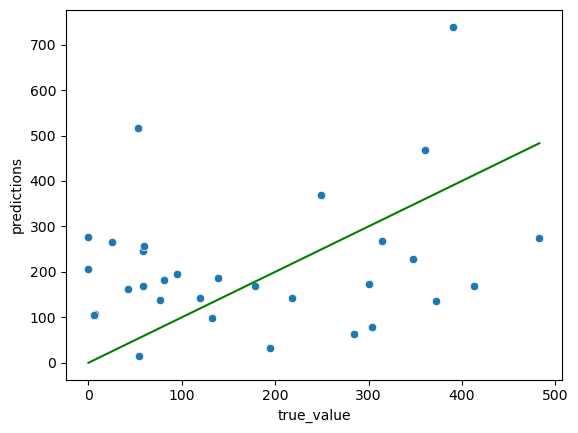

In [132]:
show_regresion_error(best_gb.predict(X_test), y_test)   


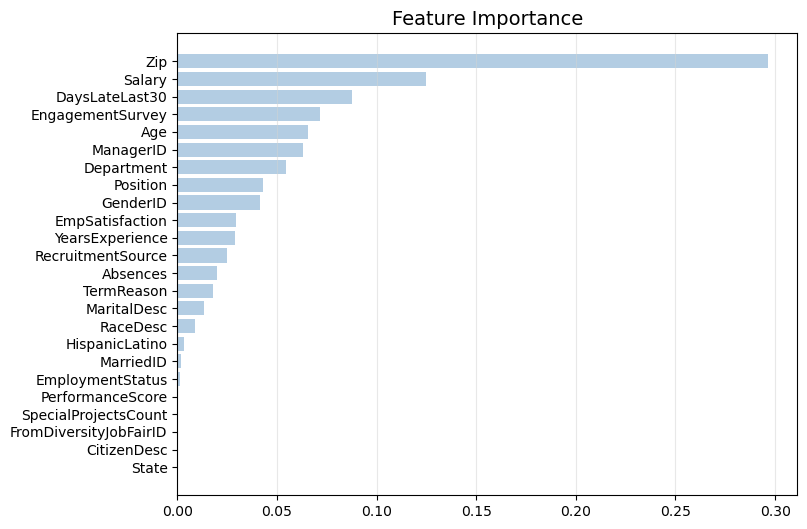

In [133]:
imp = pd.DataFrame(best_gb.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

In [134]:
y_pred_timedelta_gradiant = pd.to_timedelta(y_pred1, unit='D')

In [135]:
# Combine the last_performance_review_dates and y_pred_timedelta
combined_dates = last_performance_review_dates + y_pred_timedelta_gradiant

for review_date, combined_date in zip(last_performance_review_dates, combined_dates):
    review_date_formatted = pd.to_datetime(review_date).strftime("%m/%d/%Y")
    combined_date_formatted = combined_date.strftime("%m/%d/%Y")
    print(f"True Date: {review_date_formatted} | Predicted Date: {combined_date_formatted}")


True Date: 03/02/2015 | Predicted Date: 07/22/2015
True Date: 01/30/2013 | Predicted Date: 08/03/2013
True Date: 07/02/2017 | Predicted Date: 12/17/2017
True Date: 02/20/2013 | Predicted Date: 03/06/2013
True Date: 04/20/2015 | Predicted Date: 05/22/2015
True Date: 03/30/2013 | Predicted Date: 04/08/2015
True Date: 03/09/2018 | Predicted Date: 08/08/2019
True Date: 01/04/2015 | Predicted Date: 03/24/2015
True Date: 01/30/2016 | Predicted Date: 09/15/2016
True Date: 02/03/2016 | Predicted Date: 10/05/2016
True Date: 02/01/2016 | Predicted Date: 06/23/2016
True Date: 03/01/2015 | Predicted Date: 09/11/2015
True Date: 05/03/2012 | Predicted Date: 05/07/2013
True Date: 03/04/2013 | Predicted Date: 11/26/2013
True Date: 02/15/2015 | Predicted Date: 08/07/2015
True Date: 04/09/2017 | Predicted Date: 09/25/2017
True Date: 05/15/2012 | Predicted Date: 08/20/2012
True Date: 01/02/2012 | Predicted Date: 07/26/2012
True Date: 07/02/2018 | Predicted Date: 12/11/2018
True Date: 04/19/2014 | Predict

<h3>Random Forest Regressor</h3>

In [136]:
rf = RandomForestRegressor(random_state=RSEED)

# Define the parameter grid
parameters_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 4, 6],
    'n_estimators': [20, 50, 80]
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

# Fit the estimator
grid_search.fit(X_train, y_train)

# Get the best estimator
best = grid_search.best_estimator_

In [137]:
best_params = grid_search.best_params_

# Create a new GradientBoostingRegressor with the best parameters
best_rf = RandomForestRegressor(**best_params)

# Fit the model with the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = best_rf.predict(X_test)
y_pred1

array([150.21828794, 170.81536507, 171.76525371, 140.59208622,
       171.0645417 , 478.00749487, 224.81874527, 183.85816406,
       208.54357784, 208.60829394, 190.38784558, 153.23040098,
       203.00820417, 193.3648957 , 170.07546906, 188.15267704,
       194.59515162, 186.45657131, 175.52774301, 272.75377605,
       178.05286841, 162.60990939, 173.39358906, 178.14931571,
       188.58285954, 255.44455697, 183.82362313, 144.42384505,
       181.22431839, 188.01070799, 178.02873736])

In [138]:
mse1 = mean_squared_error(y_test, y_pred1)
mse1

17162.6312496139

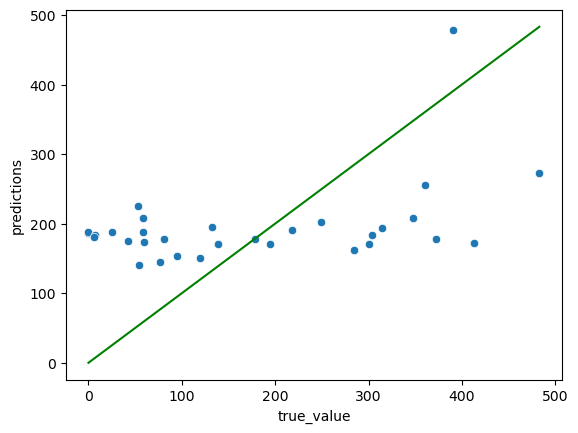

In [139]:
show_regresion_error(y_pred1, y_test)

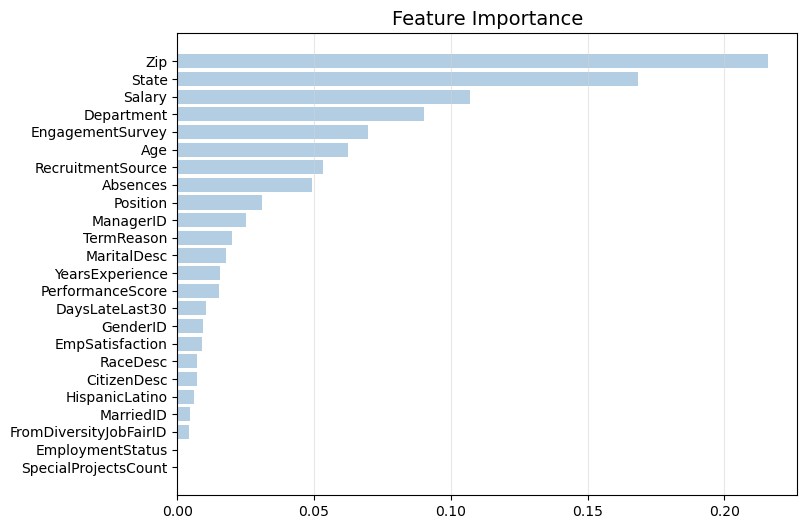

In [140]:
imp = pd.DataFrame(best_rf.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

Post process the results of the predictions and the exact termination date for each employee:

In [141]:
y_pred_timedelta_randomforest = pd.to_timedelta(y_pred1, unit='D')

combined_dates_randomforest = last_performance_review_dates + y_pred_timedelta_randomforest

for review_date, combined_date in zip(last_performance_review_dates, combined_dates_randomforest):
    review_date_formatted = pd.to_datetime(review_date).strftime("%m/%d/%Y")
    combined_date_formatted = combined_date.strftime("%m/%d/%Y")
    print(f"True Date: {review_date_formatted} | Predicted Date: {combined_date_formatted}")


True Date: 03/02/2015 | Predicted Date: 07/30/2015
True Date: 01/30/2013 | Predicted Date: 07/19/2013
True Date: 07/02/2017 | Predicted Date: 12/20/2017
True Date: 02/20/2013 | Predicted Date: 07/10/2013
True Date: 04/20/2015 | Predicted Date: 10/08/2015
True Date: 03/30/2013 | Predicted Date: 07/21/2014
True Date: 03/09/2018 | Predicted Date: 10/19/2018
True Date: 01/04/2015 | Predicted Date: 07/06/2015
True Date: 01/30/2016 | Predicted Date: 08/25/2016
True Date: 02/03/2016 | Predicted Date: 08/29/2016
True Date: 02/01/2016 | Predicted Date: 08/09/2016
True Date: 03/01/2015 | Predicted Date: 08/01/2015
True Date: 05/03/2012 | Predicted Date: 11/22/2012
True Date: 03/04/2013 | Predicted Date: 09/13/2013
True Date: 02/15/2015 | Predicted Date: 08/04/2015
True Date: 04/09/2017 | Predicted Date: 10/14/2017
True Date: 05/15/2012 | Predicted Date: 11/25/2012
True Date: 01/02/2012 | Predicted Date: 07/06/2012
True Date: 07/02/2018 | Predicted Date: 12/24/2018
True Date: 04/19/2014 | Predict

<h3>AdaBoost </h3>

In [142]:
adaboost = AdaBoostRegressor(random_state=RSEED)

# Define the parameter grid
parameters_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=parameters_grid, cv=10)

# Fit the estimator
grid_search.fit(X_train, y_train)

# Get the best estimator
best = grid_search.best_estimator_


In [143]:
y_pred_ada = best.predict(X_test)


In [144]:
mse1 = mean_squared_error(y_test, y_pred_ada)
mse1

17946.166720397538

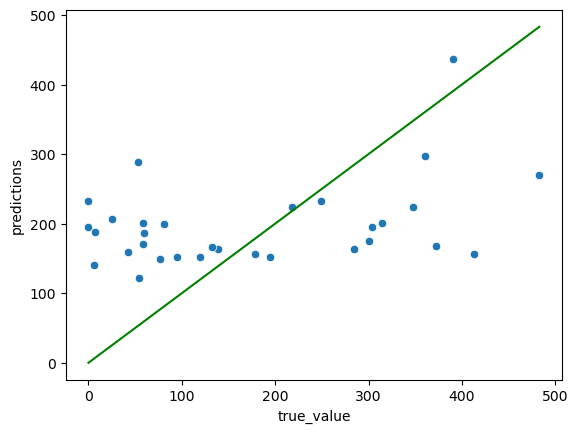

In [145]:
show_regresion_error(y_pred_ada, y_test)

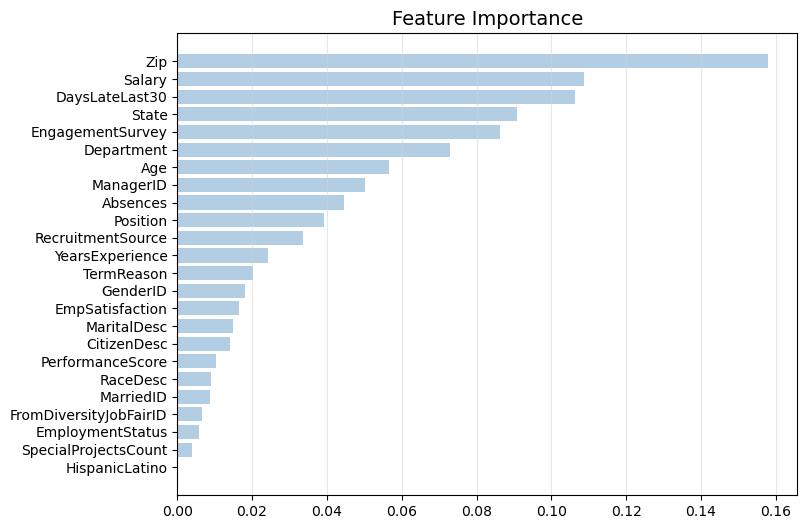

In [146]:
imp = pd.DataFrame(best.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

Post process the results of the predictions and the exact termination date for each employee:

In [147]:
y_pred_timedelta_ada = pd.to_timedelta(y_pred1, unit='D')

combined_dates_ada = last_performance_review_dates + y_pred_timedelta_ada

for review_date, combined_date in zip(last_performance_review_dates, combined_dates_ada):
    review_date_formatted = pd.to_datetime(review_date).strftime("%m/%d/%Y")
    combined_date_formatted = combined_date.strftime("%m/%d/%Y")
    print(f"True Date: {review_date_formatted} | Predicted Date: {combined_date_formatted}")


True Date: 03/02/2015 | Predicted Date: 07/30/2015
True Date: 01/30/2013 | Predicted Date: 07/19/2013
True Date: 07/02/2017 | Predicted Date: 12/20/2017
True Date: 02/20/2013 | Predicted Date: 07/10/2013
True Date: 04/20/2015 | Predicted Date: 10/08/2015
True Date: 03/30/2013 | Predicted Date: 07/21/2014
True Date: 03/09/2018 | Predicted Date: 10/19/2018
True Date: 01/04/2015 | Predicted Date: 07/06/2015
True Date: 01/30/2016 | Predicted Date: 08/25/2016
True Date: 02/03/2016 | Predicted Date: 08/29/2016
True Date: 02/01/2016 | Predicted Date: 08/09/2016
True Date: 03/01/2015 | Predicted Date: 08/01/2015
True Date: 05/03/2012 | Predicted Date: 11/22/2012
True Date: 03/04/2013 | Predicted Date: 09/13/2013
True Date: 02/15/2015 | Predicted Date: 08/04/2015
True Date: 04/09/2017 | Predicted Date: 10/14/2017
True Date: 05/15/2012 | Predicted Date: 11/25/2012
True Date: 01/02/2012 | Predicted Date: 07/06/2012
True Date: 07/02/2018 | Predicted Date: 12/24/2018
True Date: 04/19/2014 | Predict

<h3>KNN</h3>

In [148]:
knn_regressor = KNeighborsRegressor()

# Define parameter grid
parameters_grid = {
    'n_neighbors': [3, 5, 7,11,13],         # Number of neighbors
    'weights': ['uniform', 'distance'] # Weighting scheme
}

# Define grid search
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=parameters_grid, cv=10)

# Fit the estimator
grid_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Predict using the best estimator
predictions_best = best_estimator.predict(X_test)


In [149]:
y_pred = best_estimator.predict(X_test)


In [150]:
mse1 = mean_squared_error(y_test, y_pred)
mse1

21715.387896560922

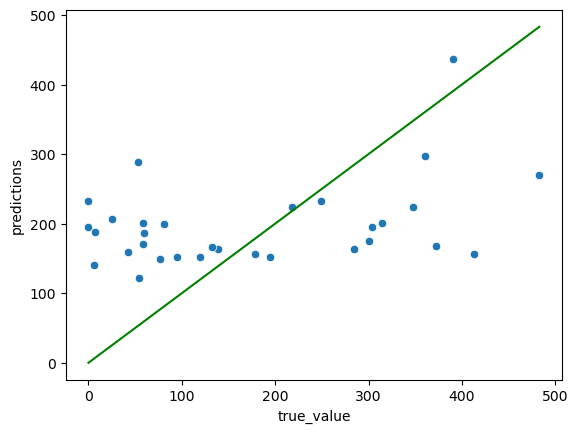

In [151]:
show_regresion_error(y_pred_ada, y_test)

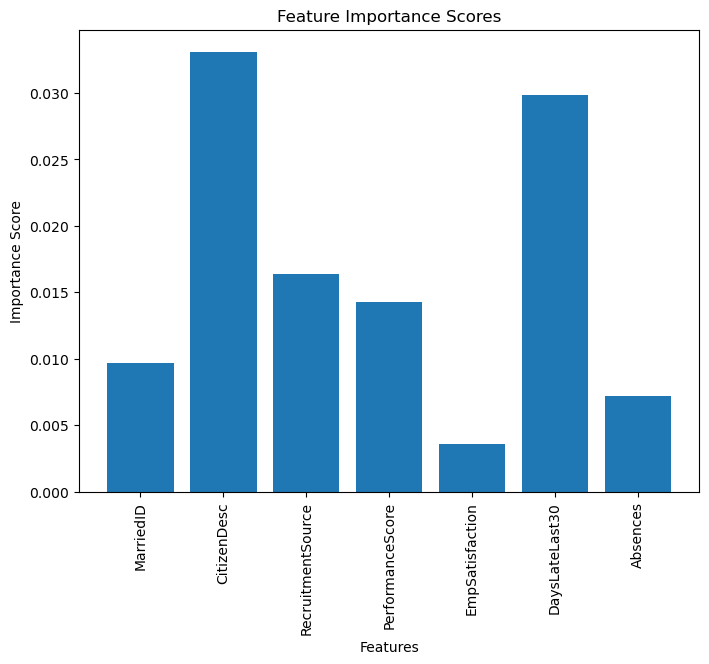

In [152]:
# Calculate permutation importance
result = permutation_importance(grid_search, X_test, y_test, n_repeats=11, random_state=RSEED)

# Get the feature importance scores
importance_scores = result.importances_mean
# Get the names of the features
feature_names = X_train.columns

# Plot the feature importance scores
plt.figure(figsize=(8, 6))
plt.bar(feature_names[importance_scores > 0], importance_scores[importance_scores > 0])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()


Post process the results of the predictions and the exact termination date for each employee:

In [153]:
y_pred_timedelta_knn = pd.to_timedelta(y_pred, unit='D')

combined_dates_knn = last_performance_review_dates + y_pred_timedelta_knn

for review_date, combined_date in zip(last_performance_review_dates, combined_dates_knn):
    review_date_formatted = pd.to_datetime(review_date).strftime("%m/%d/%Y")
    combined_date_formatted = combined_date.strftime("%m/%d/%Y")
    print(f"True Date: {review_date_formatted} | Predicted Date: {combined_date_formatted}")


True Date: 03/02/2015 | Predicted Date: 09/27/2015
True Date: 01/30/2013 | Predicted Date: 10/14/2013
True Date: 07/02/2017 | Predicted Date: 02/08/2018
True Date: 02/20/2013 | Predicted Date: 07/03/2013
True Date: 04/20/2015 | Predicted Date: 08/30/2015
True Date: 03/30/2013 | Predicted Date: 11/16/2013
True Date: 03/09/2018 | Predicted Date: 11/02/2018
True Date: 01/04/2015 | Predicted Date: 06/19/2015
True Date: 01/30/2016 | Predicted Date: 09/05/2016
True Date: 02/03/2016 | Predicted Date: 07/10/2016
True Date: 02/01/2016 | Predicted Date: 10/21/2016
True Date: 03/01/2015 | Predicted Date: 07/24/2015
True Date: 05/03/2012 | Predicted Date: 11/21/2012
True Date: 03/04/2013 | Predicted Date: 09/11/2013
True Date: 02/15/2015 | Predicted Date: 07/28/2015
True Date: 04/09/2017 | Predicted Date: 10/02/2017
True Date: 05/15/2012 | Predicted Date: 01/03/2013
True Date: 01/02/2012 | Predicted Date: 09/03/2012
True Date: 07/02/2018 | Predicted Date: 10/30/2018
True Date: 04/19/2014 | Predict

From all the 4 algorithms we see that Randomforest classifier has the best mse and prediction. 

<h2>Section E(Bonus) <h2>

Calculate the Employee Retention Rate for each year from 2008 until 2017 for every recruitment source and display it on a suitable graph.:

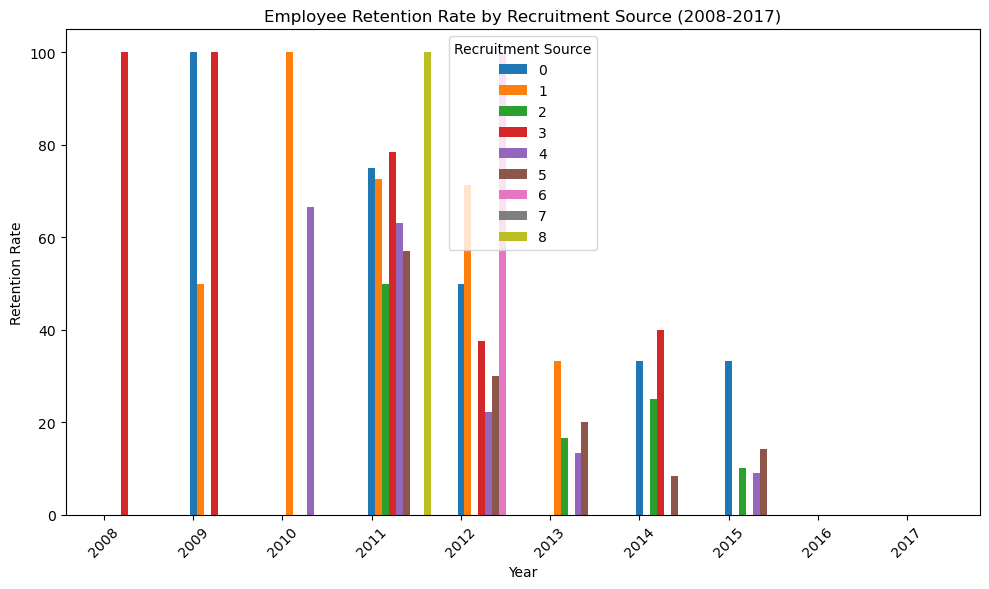

In [154]:
# Convert 'HiringDate' and 'TerminationDate' columns to datetime type
data_E['HiringDate'] = pd.to_datetime(data_E['DateofHire'])
data_E['TerminationDate'] = pd.to_datetime(data_E['DateofTermination'])

# Filter data for the years 2008 to 2017
filtered_data = data_E[(data_E['HiringDate'].dt.year >= 2008) & (data_E['HiringDate'].dt.year <= 2017)]

# Group the data by year and recruitment source
grouped_data = filtered_data.groupby([filtered_data['HiringDate'].dt.year, 'RecruitmentSource'])

# Calculate the number of employees hired and retained in each year and recruitment source
hired_counts = grouped_data.size()
retained_counts = grouped_data.apply(lambda x: ((x['TerminationDate'].isnull()) | (x['TerminationDate'].dt.year > x.name[0])).sum())

retention_rates = (retained_counts / hired_counts) * 100

retention_rates = retention_rates.unstack(level='RecruitmentSource')

# Get the years and recruitment sources for plotting
years = retention_rates.index
recruitment_sources = retention_rates.columns

# Set the width of each bar
bar_width = 0.7 / len(recruitment_sources)

# Set the position of each bar on the x-axis
bar_positions = np.arange(len(years))

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, source in enumerate(recruitment_sources):
    bars = ax.bar(bar_positions + i * bar_width, retention_rates[source], width=bar_width, label=source)

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Retention Rate')
ax.set_title('Employee Retention Rate by Recruitment Source (2008-2017)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(years)
ax.legend(title='Recruitment Source')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Find a suitable measurement to calculate the diversity index for each department based on race, gender and age and display the department in descending order of their diversity index.:

In [155]:
# Group the data by department
grouped_data = data_E.groupby('Department')

# Initialize an empty DataFrame to store the diversity index values
diversity_index = pd.DataFrame(columns=['Department', 'DiversityIndex'])

# Iterate over each department
for department, group in grouped_data:
    # Count the number of employees in the department
    total_employees = len(group)
    
    # Calculate the proportion of each category within the department
    race_proportions = group['RaceDesc'].value_counts() / total_employees
    gender_proportions = group['Sex'].value_counts() / total_employees
    age_proportions = group['Age'].value_counts() / total_employees
    
    # Calculate the Simpson's Diversity Index for each category
    race_diversity = 1 - (race_proportions ** 2).sum()
    gender_diversity = 1 - (gender_proportions ** 2).sum()
    age_diversity = 1 - (age_proportions ** 2).sum()
    
    # Calculate the overall diversity index for the department
    department_diversity = (race_diversity + gender_diversity + age_diversity) / 3
    
    # Append the department and diversity index values to the DataFrame
    diversity_index = diversity_index.append({'Department': department, 'DiversityIndex': department_diversity}, ignore_index=True)

# Sort the DataFrame by diversity index in descending order
diversity_index = diversity_index.sort_values(by='DiversityIndex', ascending=False)

# Display the departments in descending order of their diversity index
print(diversity_index)


   Department  DiversityIndex
4         4.0        0.695803
2         2.0        0.661333
3         3.0        0.656670
5         5.0        0.622590
0         0.0        0.576132
1         1.0        0.000000


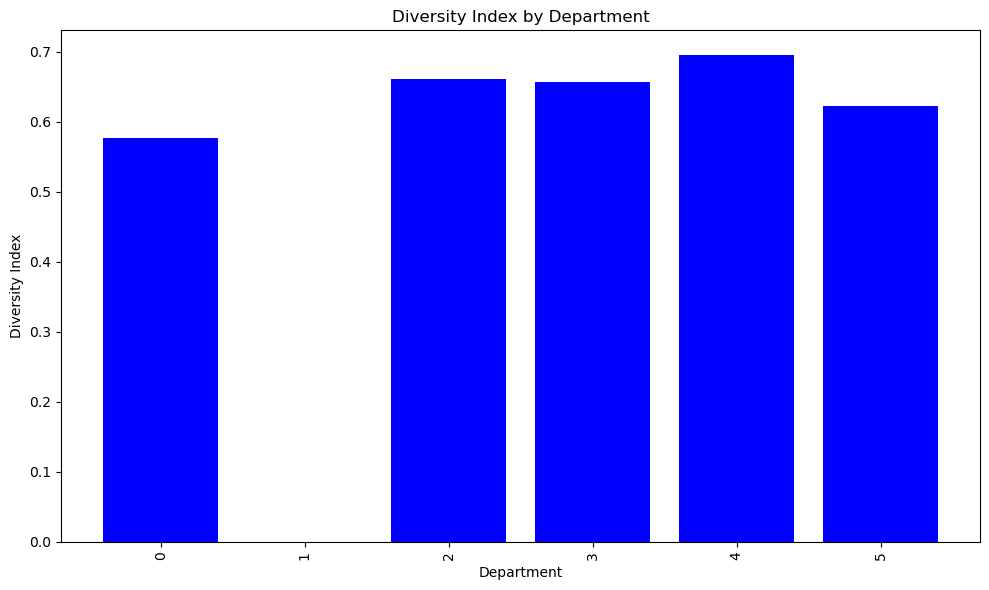

In [156]:
plt.figure(figsize=(10, 6))
plt.bar(diversity_index['Department'], diversity_index['DiversityIndex'], color='blue')
plt.xlabel('Department')
plt.ylabel('Diversity Index')
plt.title('Diversity Index by Department')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Create a map visualization that shows the number of employees that currently work in the company from each state. The map should display the state ID and the number of employees, color the state by the intensity of the number of employees.:

In [157]:
data_E['State'].unique()

array(['MA', 'TX', 'CT', 'VA', 'VT', 'AL', 'WA', 'CA', 'OH', 'IN', 'TN',
       'NH', 'RI', 'PA', 'CO', 'NY', 'UT', 'GA', 'FL', 'NC', 'KY', 'ID',
       'NV', 'MT', 'OR', 'ND', 'AZ', 'ME'], dtype=object)

In [158]:
# Filter the data for employees that currently work
active_employees = data_E[data_E['DateofTermination'] != pd.Timestamp('1900-01-01')]

# Count the number of employees in each state
state_employee_count = active_employees['State'].value_counts().reset_index()
state_employee_count.columns = ['State', 'EmployeeCount']


In [159]:
state_employee_count

,State,EmployeeCount
0,MA,99
1,CT,1
2,VA,1
3,OH,1
4,TN,1
5,PA,1


In [160]:
#pip install folium

# Create a base map centered on the US
map = folium.Map(location=[37, -95], zoom_start=4)

# Create a choropleth map layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='Employee Count',
    data=state_employee_count,
    columns=['State', 'EmployeeCount'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Employees',
    highlight=True
).add_to(map)

# Add labels to the states
for idx, row in state_employee_count.iterrows():
    state = row['State']
    count = row['EmployeeCount']
    folium.Marker(
        location=[0, 0],
        icon=folium.DivIcon(
            html=f'<div style="font-weight:bold; color:#ffffff; background-color:#000000; padding:4px">{state}<br>{count}</div>',
            icon_size=(80, 30),
            )
        ).add_to(map)

# Display the map
map
